# COGS 108 - EDA Checkpoint

# Names

- Anh Vuong
- Anh Bach
- Anh Pham
- Huy Nguyen

<a id='research_question'></a>
# Research Question

* How have housing costs (rent and owner-occupied) in California (based on cities) change over time from 2020 to 2021, and how does this compare to Texas?
* What percentage of of a household income is typically spent on housing in California from 2020 to 2021, and how does this compare to Texas?
* What has been the population rate of California over time, and how has it changed from 2020 to 2021? 
* Does increase in housing costs affect the decreasing in California's populations from 2020 to 2021?

# Dataset(s)

- Dataset Name: Rentals  
- Link to the dataset: https://files.zillowstatic.com/research/public_csvs/zori/City_zori_sm_month.csv?t=1684286197
- Number of observations: 3058

The Rentals dataset is found on Zillow. The dataset contains different regions in the U.S, rental prices dates, and states. 

- Dataset Name: Home Values  
- Link to the dataset: https://files.zillowstatic.com/research/public_csvs/zhvi/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1684286197
- Number of observations: 22258

The Home Values dataset is found on Zillow. The dataset contains home values (including houses, single-family residential homes, condos, and cooperative housing) for different regions in the U.S., dates, and states.

- Dataset Name: Financial Characteristics
- Link to the dataset:  
https://data.census.gov/table?q=state+housing+cost&tid=ACSST5Y2020.S2503  
https://data.census.gov/table?q=state+housing+cost&tid=ACSST5Y2021.S2503
- Number of observations: 49

The Financial Characteristics dataset is found on the U.S. Census Bureau website. The dataset contains the Household Income in the past 12 months (In 2020 and 2-2021 inflation-adjusted dollars) and the Monthly Housing Costs in both 2020 and 2021 for all 50 states in the U.S. including District of Columbia and Puerto Rico.  

- Dataset Name: U.S. Populations
- Link to the dataset:  
https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/
- Number of observations: 66

The U.S. Population dataset is found on the U.S. Census Bureau website. The dataset contains estimated populations for all regions in the United States from 2020 to 2022 including birth rate, death rate, international immigration, and domestic immigration
  
- Dataset Name: U.S. Population by Cities
- Link to the dataset: (1st file)
https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/cities/totals/
- Number of observations: 81395

The U.S. Population by Cities dataset is found on the U.S. Census Bureau website. The dataset contains estimated populations for all cities in the United States from 2020 to 2022 based on cities and state. 


Our analysis involves five interconnected datasets: California and Texas populations, housing prices (rentals and home values), and the amount of residents' income spent on housing. By examining these datasets, we aim to uncover trends in population growth or decline as well as changes in housing costs (both rentals and home values) from 2020 to 2021 in both states. Furthermore, we will investigate whether there is a burden on residents in terms of housing expenses and explore if this factor contributes to the migration of California residents to other states.

# Setup

In [1]:
# import working with data libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
pd.set_option('display.float_format', '{:.2f}'.format)

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
# Set auto format on all cells
%autosave 0

Autosave disabled


### Rentals

In [3]:
rentals = pd.read_csv('data/Cities_rent_prices.csv')
rentals.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2015-03-31,2015-04-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2713.60,2739.39,...,3502.84,3533.91,3532.30,3507.20,3462.29,3428.61,3417.70,3431.30,3457.78,3499.71
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1956.88,1965.96,...,2879.22,2894.26,2908.89,2901.41,2892.76,2884.37,2882.66,2884.80,2890.98,2902.22
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1277.77,1283.62,...,1594.23,1601.71,1601.11,1596.78,1589.47,1585.43,1591.96,1601.85,1611.70,1616.97
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1586.58,1601.00,...,2002.34,2009.10,2008.05,2002.81,1994.91,1995.00,2001.11,2017.67,2035.22,2055.12
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,1026.43,1034.26,...,1476.50,1480.10,1478.38,1468.80,1465.44,1460.62,1464.34,1461.77,1471.29,1472.29


### Home Values

In [4]:
home_values = pd.read_csv('data/Home_values.csv')
home_values.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,131748.38,132455.15,...,651406.91,652566.15,649451.98,647042.56,644116.65,639562.42,636574.80,636522.38,640865.68,648402.40
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,215492.29,215796.93,...,958752.17,956301.04,951672.56,946636.08,944122.95,940643.45,931859.83,918976.83,907602.72,901961.10
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,98322.10,98295.78,...,265763.78,266867.32,267073.58,267042.88,267029.70,266274.68,264819.96,263256.31,262531.09,262337.29
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,121417.33,121451.26,...,285802.83,283550.66,280876.67,278762.11,277787.20,276777.00,277879.30,279127.25,280811.96,281258.73
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,97194.62,97285.79,...,266901.69,267741.24,267389.56,266847.73,266298.89,265154.99,264000.20,263038.48,263217.00,263230.89


### Financial Characteristics

In [5]:
# 2020 dataset
df2020 = pd.read_csv('data/ACSST5Y2020.S2503-2023-05-17T062125.csv')
df2020.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Percent owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate,Wyoming!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate
0,Occupied housing units,"1,888,504","1,888,504","1,306,505","1,306,505","581,999","581,999","255,173","255,173","165,376",...,"165,530","165,530","67,701","67,701","1,205,749","1,205,749","817,399","817,399","388,350","388,350"
1,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Less than $5,000","77,186",4.1%,"31,936",2.4%,"45,250",7.8%,"5,949",2.3%,"2,800",...,"3,088",1.9%,"2,982",4.4%,"178,920",14.8%,"70,259",8.6%,"108,661",28.0%
3,"$5,000 to $9,999","76,449",4.0%,"28,772",2.2%,"47,677",8.2%,"3,869",1.5%,"1,735",...,"2,413",1.5%,"3,580",5.3%,"139,250",11.5%,"78,136",9.6%,"61,114",15.7%
4,"$10,000 to $14,999","105,415",5.6%,"50,340",3.9%,"55,075",9.5%,"7,476",2.9%,"3,020",...,"3,775",2.3%,"4,927",7.3%,"140,728",11.7%,"91,381",11.2%,"49,347",12.7%


In [6]:
# 2021 dataset
df2021 = pd.read_csv('data/ACSST5Y2021.S2503-2023-05-17T062108.csv')
df2021.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Percent owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate,Wyoming!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate
0,Occupied housing units,"1,902,983","1,902,983","1,320,571","1,320,571","582,412","582,412","260,561","260,561","171,207",...,"165,359","165,359","65,294","65,294","1,196,790","1,196,790","814,154","814,154","382,636","382,636"
1,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Less than $5,000","75,815",4.0%,"32,168",2.4%,"43,647",7.5%,"6,479",2.5%,"2,955",...,"3,126",1.9%,"2,923",4.5%,"168,882",14.1%,"65,579",8.1%,"103,303",27.0%
3,"$5,000 to $9,999","64,390",3.4%,"24,291",1.8%,"40,099",6.9%,"4,165",1.6%,"1,823",...,"2,144",1.3%,"3,364",5.2%,"130,319",10.9%,"73,900",9.1%,"56,419",14.7%
4,"$10,000 to $14,999","103,832",5.5%,"47,049",3.6%,"56,783",9.7%,"7,170",2.8%,"2,984",...,"3,700",2.2%,"4,823",7.4%,"137,111",11.5%,"88,834",10.9%,"48,277",12.6%


### Population

In [7]:
df_pop_est = pd.read_csv('./data/NST-EST2022-ALLDATA.csv')
df_pop_est.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.36,10.35,0.43,0.74,1.13,3.04,0.00,0.00,1.13,3.04
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.78,9.87,0.21,0.51,1.40,3.75,-4.86,-8.06,-3.45,-4.31
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.53,9.89,-0.31,-0.21,1.77,4.66,1.55,-3.77,3.32,0.89
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.87,9.86,0.39,0.77,1.27,3.43,-7.14,-9.61,-5.87,-6.18
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.06,11.17,-0.21,-0.13,0.80,2.11,-2.65,-2.53,-1.84,-0.42


# Population By Cities

In [8]:
cities_pop = pd.read_csv('data/sub-est2022.csv')
cities_pop.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022
0,40,1,0,0,0,0,0,A,Alabama,Alabama,5024356,5031362,5049846,5074296
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,2355,2356,2361,2366
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,4372,4360,4292,4224
3,162,1,0,484,0,0,0,A,Addison town,Alabama,661,659,666,669
4,162,1,0,676,0,0,0,A,Akron town,Alabama,227,226,226,221


# Data Cleaning

### Cleaning Rentals and Home Values

First, we only keep the columns that are necessary for our analysis in both Home Values and Rentals datasets. Therefore, we will remove unnecessary and duplicated columns such as RegionID, SizeRank, RegionType, Metro, StateName.

In [9]:
rentals_df = rentals.drop(columns = ['RegionID', 'SizeRank', 'RegionType', 'StateName', 'Metro'])
rentals_df.head()

,RegionName,State,CountyName,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,New York,NY,Queens County,2713.60,2739.39,2762.87,2785.53,2800.16,2814.59,2826.08,...,3502.84,3533.91,3532.30,3507.20,3462.29,3428.61,3417.70,3431.30,3457.78,3499.71
1,Los Angeles,CA,Los Angeles County,1956.88,1965.96,1983.06,1996.93,2018.20,2035.56,2054.40,...,2879.22,2894.26,2908.89,2901.41,2892.76,2884.37,2882.66,2884.80,2890.98,2902.22
2,Houston,TX,Harris County,1277.77,1283.62,1293.96,1306.04,1311.23,1317.00,1313.47,...,1594.23,1601.71,1601.11,1596.78,1589.47,1585.43,1591.96,1601.85,1611.70,1616.97
3,Chicago,IL,Cook County,1586.58,1601.00,1616.00,1626.78,1635.25,1640.22,1640.08,...,2002.34,2009.10,2008.05,2002.81,1994.91,1995.00,2001.11,2017.67,2035.22,2055.12
4,San Antonio,TX,Bexar County,1026.43,1034.26,1044.44,1051.87,1055.72,1054.79,1052.94,...,1476.50,1480.10,1478.38,1468.80,1465.44,1460.62,1464.34,1461.77,1471.29,1472.29


In [10]:
home_values_df = home_values.drop(columns = ['RegionID', 'SizeRank', 'RegionType', 'StateName', 'Metro'])
home_values_df.head()

,RegionName,State,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,New York,NY,Queens County,131748.38,132455.15,133172.63,134560.11,135952.72,137452.07,139023.21,...,651406.91,652566.15,649451.98,647042.56,644116.65,639562.42,636574.80,636522.38,640865.68,648402.40
1,Los Angeles,CA,Los Angeles County,215492.29,215796.93,216730.58,218588.29,220924.23,223189.63,225514.65,...,958752.17,956301.04,951672.56,946636.08,944122.95,940643.45,931859.83,918976.83,907602.72,901961.10
2,Houston,TX,Harris County,98322.10,98295.78,98159.00,98115.04,98097.22,98260.88,98465.22,...,265763.78,266867.32,267073.58,267042.88,267029.70,266274.68,264819.96,263256.31,262531.09,262337.29
3,Chicago,IL,Cook County,121417.33,121451.26,121760.21,122543.59,123591.28,124725.04,125781.21,...,285802.83,283550.66,280876.67,278762.11,277787.20,276777.00,277879.30,279127.25,280811.96,281258.73
4,San Antonio,TX,Bexar County,97194.62,97285.79,97355.59,97480.82,97032.68,96417.65,95749.36,...,266901.69,267741.24,267389.56,266847.73,266298.89,265154.99,264000.20,263038.48,263217.00,263230.89


Secondly, we only want to keep the data for two states (California and Texas) from 2020 to 2021 in both Home Values and Rentals datasets for futher analysis so we will remove all data that is not from California and Texas and in the range 2020 to 2021. 

In [11]:
date_columns = rentals_df.columns[rentals_df.columns.str.match(r'\d{4}-\d{2}-\d{2}')]
under_2020 = [col for col in date_columns if '2015' <= col[:4] < '2020']
above_2021 = [col for col in date_columns if '2022' <= col[:4]]
rentals_df = rentals_df.drop(columns = under_2020)
rentals_df = rentals_df.drop(columns = above_2021)
desired_states = ['CA', 'TX']
rentals_df = rentals_df[rentals_df['State'].isin(desired_states)]
rentals_df.head()

,RegionName,State,CountyName,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,Los Angeles,CA,Los Angeles County,2510.28,2518.62,2517.04,2500.80,2475.75,2456.68,2450.78,...,2422.79,2438.46,2463.39,2495.74,2539.99,2595.53,2637.64,2668.22,2685.79,2707.70
2,Houston,TX,Harris County,1393.81,1396.58,1398.85,1392.25,1381.54,1370.17,1368.06,...,1373.25,1388.31,1414.68,1446.19,1476.32,1502.31,1513.30,1521.81,1523.82,1531.17
4,San Antonio,TX,Bexar County,1194.69,1199.10,1200.11,1196.88,1194.36,1194.06,1199.38,...,1227.98,1241.48,1261.77,1285.28,1314.39,1349.42,1377.23,1389.72,1390.66,1394.12
8,San Diego,CA,San Diego County,2284.07,2291.36,2299.29,2286.39,2272.85,2265.46,2279.49,...,2366.21,2398.51,2448.29,2495.34,2551.46,2614.24,2678.74,2726.51,2759.68,2772.30
9,Dallas,TX,Dallas County,1384.97,1392.60,1401.31,1399.37,1393.15,1386.81,1385.40,...,1409.04,1430.89,1459.24,1497.13,1536.56,1568.75,1591.49,1599.46,1610.59,1616.32


In [12]:
date_columns = home_values_df.columns[home_values_df.columns.str.match(r'\d{4}-\d{2}-\d{2}')]
under_2020 = [col for col in date_columns if '2000' <= col[:4] < '2020']
above_2021 = [col for col in date_columns if '2022' <= col[:4]]
home_values_df = home_values_df.drop(columns = under_2020)
home_values_df = home_values_df.drop(columns = above_2021)
desired_states = ['CA', 'TX']
home_values_df = home_values_df[home_values_df['State'].isin(desired_states)]
home_values_df.head()

,RegionName,State,CountyName,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,Los Angeles,CA,Los Angeles County,718764.06,721724.91,723314.01,724390.00,722622.73,718010.76,717494.09,...,801985.93,808613.99,819086.43,832229.17,847534.39,860706.60,872235.27,881017.62,889984.77,899778.21
2,Houston,TX,Harris County,192470.07,193304.53,194095.50,194661.91,194793.17,194865.30,195259.70,...,212538.59,215555.29,218936.54,222528.44,225677.57,227879.47,229380.34,231156.00,233653.48,236598.49
4,San Antonio,TX,Bexar County,191295.67,192483.68,193537.30,194249.51,194590.77,194859.07,195555.95,...,213935.53,216757.46,219858.64,223260.88,226477.76,228939.85,230744.21,232470.05,234943.26,237959.70
8,San Diego,CA,San Diego County,645762.30,649821.29,654802.93,660529.98,663553.88,664411.67,664944.17,...,742320.48,755756.36,771645.30,788159.71,802479.12,810910.50,814848.73,818352.86,824976.14,835340.08
9,Dallas,TX,Dallas County,223110.97,225481.89,227739.70,228695.15,228468.47,227804.86,227776.65,...,253019.53,257051.43,260825.87,264337.46,267366.64,269532.27,271337.46,273289.33,276098.17,279462.22


Then, we want to create two different tables (rentals and home values) for California and Texas separately and sort the tables in decreasing order for futher analysis.

In [13]:
CA_rentals = rentals_df[rentals_df['State'] == 'CA']
date_columns = CA_rentals.columns[CA_rentals.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

year_2020 = [col for col in date_columns if col[:4] == '2020']
CA_rentals['2020 Rentals'] = CA_rentals[year_2020].mean(axis=1, skipna=True)
year_2021 = [col for col in date_columns if col[:4] == '2021']
CA_rentals['2021 Rentals'] = CA_rentals[year_2021].mean(axis=1, skipna= True)

CA_rentals_df = CA_rentals[['RegionName', 'State', 'CountyName', '2020 Rentals', '2021 Rentals']]
years = ['2020 Rentals', '2021 Rentals']
CA_rentals_df = CA_rentals_df.sort_values(by= years, ascending=False)

CA_rentals_df.head()

,RegionName,State,CountyName,2020 Rentals,2021 Rentals
2487,Malibu,CA,Los Angeles County,10146.77,12119.09
2365,Coronado,CA,San Diego County,4515.23,5062.86
1621,Manhattan Beach,CA,Los Angeles County,4500.53,4735.68
779,Palo Alto,CA,Santa Clara County,4049.45,3946.45
2374,Laguna Beach,CA,Orange County,4024.19,4598.19


In [14]:
CA_home_values = home_values_df[home_values_df['State'] == 'CA']
date_columns = CA_home_values.columns[CA_home_values.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

year_2020 = [col for col in date_columns if col[:4] == '2020']
CA_home_values['2020 Home Values'] = CA_home_values[year_2020].mean(axis=1, skipna=True)
year_2021 = [col for col in date_columns if col[:4] == '2021']
CA_home_values['2021 Home Values'] = CA_home_values[year_2021].mean(axis=1, skipna= True)

CA_home_values_df = CA_home_values[['RegionName', 'State', 'CountyName', '2020 Home Values', '2021 Home Values']]
years = ['2020 Home Values', '2021 Home Values']
CA_home_values_df = CA_home_values_df.sort_values(by= years, ascending=False)

CA_home_values_df.head()


,RegionName,State,CountyName,2020 Home Values,2021 Home Values
6506,Atherton,CA,San Mateo County,6082732.22,6940974.87
6163,Los Altos Hills,CA,Santa Clara County,4309094.15,4855607.99
4918,Hillsborough,CA,San Mateo County,4141242.17,4745918.94
12534,Belvedere,CA,Marin County,3557472.75,4110908.36
14910,Hidden Hills,CA,Los Angeles County,3533298.64,4170815.07


In [15]:
CA_housings = pd.merge(CA_rentals_df, CA_home_values_df, on=['RegionName', 'State', 'CountyName'], how='inner')
CA_housings.head()

,RegionName,State,CountyName,2020 Rentals,2021 Rentals,2020 Home Values,2021 Home Values
0,Malibu,CA,Los Angeles County,10146.77,12119.09,2397464.18,2986831.75
1,Coronado,CA,San Diego County,4515.23,5062.86,1695783.52,1958157.17
2,Manhattan Beach,CA,Los Angeles County,4500.53,4735.68,2262795.39,2587550.28
3,Palo Alto,CA,Santa Clara County,4049.45,3946.45,2807007.97,3079778.66
4,Laguna Beach,CA,Orange County,4024.19,4598.19,1943903.55,2301971.24


In [16]:
TX_rentals = rentals_df[rentals_df['State'] == 'TX']
date_columns = TX_rentals.columns[TX_rentals.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

year_2020 = [col for col in date_columns if col[:4] == '2020']
TX_rentals['2020 Rentals'] = TX_rentals[year_2020].mean(axis=1, skipna=True)
year_2021 = [col for col in date_columns if col[:4] == '2021']
TX_rentals['2021 Rentals'] = TX_rentals[year_2021].mean(axis=1, skipna= True)

TX_rentals_df = TX_rentals[['RegionName', 'State', 'CountyName', '2020 Rentals', '2021 Rentals']]
years = ['2020 Rentals', '2021 Rentals']
TX_rentals_df = TX_rentals_df.sort_values(by= years, ascending=False)

TX_rentals_df.head()

,RegionName,State,CountyName,2020 Rentals,2021 Rentals
1465,Midlothian,TX,Ellis County,1895.13,2116.69
2835,Bee Cave,TX,Travis County,1791.47,2076.95
701,Flower Mound,TX,Denton County,1737.85,1928.41
844,Little Elm,TX,Denton County,1721.88,1999.27
419,Missouri City,TX,Fort Bend County,1698.06,1845.31


In [17]:
TX_home_values = home_values_df[home_values_df['State'] == 'TX']
date_columns = TX_home_values.columns[TX_home_values.columns.str.match(r'\d{4}-\d{2}-\d{2}')]

year_2020 = [col for col in date_columns if col[:4] == '2020']
TX_home_values['2020 Home Values'] = TX_home_values[year_2020].mean(axis=1, skipna=True)
year_2021 = [col for col in date_columns if col[:4] == '2021']
TX_home_values['2021 Home Values'] = TX_home_values[year_2021].mean(axis=1, skipna= True)

TX_home_values_df = TX_home_values[['RegionName', 'State', 'CountyName', '2020 Home Values', '2021 Home Values']]
years = ['2020 Home Values', '2021 Home Values']
TX_home_values_df = TX_home_values_df.sort_values(by= years, ascending=False)

TX_home_values_df.head()

,RegionName,State,CountyName,2020 Home Values,2021 Home Values
15352,Westover Hills,TX,Tarrant County,1596170.15,1807368.69
14761,Rollingwood,TX,Travis County,1594811.21,1964007.84
5818,Highland Park,TX,Dallas County,1556576.77,1829795.60
9922,West Lake Hills,TX,Travis County,1388718.36,1762152.93
2471,University Park,TX,Dallas County,1369360.37,1561514.78


In [18]:
TX_housings = pd.merge(TX_rentals_df, TX_home_values_df, on=['RegionName', 'State', 'CountyName'], how='inner')
TX_housings.head()

,RegionName,State,CountyName,2020 Rentals,2021 Rentals,2020 Home Values,2021 Home Values
0,Midlothian,TX,Ellis County,1895.13,2116.69,324437.84,375673.46
1,Bee Cave,TX,Travis County,1791.47,2076.95,634045.23,801295.49
2,Flower Mound,TX,Denton County,1737.85,1928.41,469449.36,520467.59
3,Little Elm,TX,Denton County,1721.88,1999.27,327963.17,372731.03
4,Missouri City,TX,Fort Bend County,1698.06,1845.31,267954.83,300671.12


### Cleaning Population By Cities

Firstly, we remove the unnecessary columns that are not useful for futher analysis such as SUMLEV, STATE, COUNTY, PLACE, COUSUB, CONCIT, PRIMGEO_FLAG, FUNCSTAT, ESTIMATESBASE2020, POPESTIMATE2022.

In [19]:
cities_pop = cities_pop.drop(columns = ['SUMLEV', 'STATE', 'COUNTY', 'PLACE', 'COUSUB', 'CONCIT', 'PRIMGEO_FLAG', 'FUNCSTAT', 'ESTIMATESBASE2020', 'POPESTIMATE2022'])
cities_pop.head()

,NAME,STNAME,POPESTIMATE2020,POPESTIMATE2021
0,Alabama,Alabama,5031362,5049846
1,Abbeville city,Alabama,2356,2361
2,Adamsville city,Alabama,4360,4292
3,Addison town,Alabama,659,666
4,Akron town,Alabama,226,226


Then, we want to merge the population based on cities from 2020 to 2021 to California's home values and rentals tables and remove any unnecessary columns or remove any region with null value.

In [20]:
CA_cities_populations = cities_pop[cities_pop['STNAME'] == 'California']
CA_cities_populations = CA_cities_populations.rename(columns={'NAME': 'RegionName'})
CA_cities_populations = CA_cities_populations.drop([2853])
CA_cities_populations['RegionName'] = CA_cities_populations['RegionName'].str.replace(' city', '', case=False)
CA_cities_populations.head()

,RegionName,STNAME,POPESTIMATE2020,POPESTIMATE2021
2854,Adelanto,California,38128,38436
2855,Agoura Hills,California,20227,19802
2856,Alameda,California,78044,76246
2857,Albany,California,20225,19823
2858,Alhambra,California,82657,81168


In [21]:
#  Merge to home values
CA_home_values_df['RegionName'] = CA_home_values_df['RegionName'].str.replace(' city', '', case=False)
CA_home_values_df
CA_homevalues_population = pd.merge(CA_home_values_df, CA_cities_populations, on='RegionName', how='inner')
CA_homevalues_population = CA_homevalues_population.drop('STNAME', axis=1)
has_nan = CA_homevalues_population.isnull().values.any()
print(has_nan)
CA_homevalues_population.head()

False


,RegionName,State,CountyName,2020 Home Values,2021 Home Values,POPESTIMATE2020,POPESTIMATE2021
0,Belvedere,CA,Marin County,3557472.75,4110908.36,2126,2115
1,Belvedere,CA,Marin County,3557472.75,4110908.36,2126,2115
2,Hidden Hills,CA,Los Angeles County,3533298.64,4170815.07,1722,1700
3,Hidden Hills,CA,Los Angeles County,3533298.64,4170815.07,1722,1700
4,Beverly Hills,CA,Los Angeles County,3254567.28,3508249.49,32581,31852


In [22]:
# Merge to Rentals
CA_rentals_df['RegionName'] = CA_rentals_df['RegionName'].str.replace(' city', '', case=False)
CA_rentals_population = pd.merge(CA_rentals_df, CA_cities_populations, on='RegionName', how='inner')
CA_rentals_population = CA_rentals_population.drop('STNAME', axis=1)
has_nan = CA_rentals_population.isnull().values.any()
print(has_nan)
CA_rentals_population = CA_rentals_population.dropna()
has_nan = CA_rentals_population.isnull().values.any()
print(has_nan)
CA_rentals_population.head()

True
False


,RegionName,State,CountyName,2020 Rentals,2021 Rentals,POPESTIMATE2020,POPESTIMATE2021
0,Malibu,CA,Los Angeles County,10146.77,12119.09,10617,10416
1,Malibu,CA,Los Angeles County,10146.77,12119.09,10617,10416
2,Coronado,CA,San Diego County,4515.23,5062.86,18136,19040
3,Coronado,CA,San Diego County,4515.23,5062.86,18136,19040
4,Manhattan Beach,CA,Los Angeles County,4500.53,4735.68,35377,34601


### Cleaning Financial Characteristics Datasets

Firstly, we need to separate each of our 2020 and 2021 datasets into two different tables of Household Income and Housing Cost and remove rows where all the columns have missing data for that participant in 4 tables.

In [23]:
household_income_2020 = df2020.loc[1:13]
household_income_2020 = household_income_2020.dropna()
household_income_2020.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Percent owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate,Wyoming!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate
2,"Less than $5,000","77,186",4.1%,"31,936",2.4%,"45,250",7.8%,"5,949",2.3%,"2,800",...,"3,088",1.9%,"2,982",4.4%,"178,920",14.8%,"70,259",8.6%,"108,661",28.0%
3,"$5,000 to $9,999","76,449",4.0%,"28,772",2.2%,"47,677",8.2%,"3,869",1.5%,"1,735",...,"2,413",1.5%,"3,580",5.3%,"139,250",11.5%,"78,136",9.6%,"61,114",15.7%
4,"$10,000 to $14,999","105,415",5.6%,"50,340",3.9%,"55,075",9.5%,"7,476",2.9%,"3,020",...,"3,775",2.3%,"4,927",7.3%,"140,728",11.7%,"91,381",11.2%,"49,347",12.7%
5,"$15,000 to $19,999","106,327",5.6%,"54,698",4.2%,"51,629",8.9%,"8,007",3.1%,"3,623",...,"4,603",2.8%,"5,040",7.4%,"122,435",10.2%,"80,281",9.8%,"42,154",10.9%
6,"$20,000 to $24,999","100,073",5.3%,"55,652",4.3%,"44,421",7.6%,"7,832",3.1%,"3,511",...,"4,569",2.8%,"4,668",6.9%,"98,371",8.2%,"71,287",8.7%,"27,084",7.0%


In [24]:
housing_costs_2020 = df2020.loc[14:25]
housing_costs_2020 = housing_costs_2020.dropna()
housing_costs_2020.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Percent owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate,Wyoming!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate
15,Less than $300,"220,476",11.7%,"192,456",14.7%,"28,020",4.8%,"11,320",4.4%,"10,102",...,"14,327",8.7%,"2,749",4.1%,"493,118",40.9%,"439,938",53.8%,"53,180",13.7%
16,$300 to $499,"320,897",17.0%,"266,729",20.4%,"54,168",9.3%,"19,094",7.5%,"15,295",...,"31,434",19.0%,"4,621",6.8%,"140,916",11.7%,"71,179",8.7%,"69,737",18.0%
17,$500 to $799,"387,135",20.5%,"215,444",16.5%,"171,691",29.5%,"33,030",12.9%,"24,447",...,"24,978",15.1%,"19,569",28.9%,"192,166",15.9%,"118,409",14.5%,"73,757",19.0%
18,$800 to $999,"251,969",13.3%,"138,513",10.6%,"113,456",19.5%,"23,919",9.4%,"11,803",...,"12,317",7.4%,"12,270",18.1%,"88,653",7.4%,"68,505",8.4%,"20,148",5.2%
19,"$1,000 to $1,499","393,335",20.8%,"270,817",20.7%,"122,518",21.1%,"54,870",21.5%,"25,834",...,"35,366",21.4%,"15,313",22.6%,"90,700",7.5%,"77,039",9.4%,"13,661",3.5%


In [25]:
household_income_2021 = df2021.loc[1:13]
household_income_2021 = household_income_2021.dropna()
household_income_2021.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Percent owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate,Wyoming!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate
2,"Less than $5,000","75,815",4.0%,"32,168",2.4%,"43,647",7.5%,"6,479",2.5%,"2,955",...,"3,126",1.9%,"2,923",4.5%,"168,882",14.1%,"65,579",8.1%,"103,303",27.0%
3,"$5,000 to $9,999","64,390",3.4%,"24,291",1.8%,"40,099",6.9%,"4,165",1.6%,"1,823",...,"2,144",1.3%,"3,364",5.2%,"130,319",10.9%,"73,900",9.1%,"56,419",14.7%
4,"$10,000 to $14,999","103,832",5.5%,"47,049",3.6%,"56,783",9.7%,"7,170",2.8%,"2,984",...,"3,700",2.2%,"4,823",7.4%,"137,111",11.5%,"88,834",10.9%,"48,277",12.6%
5,"$15,000 to $19,999","99,829",5.2%,"53,470",4.0%,"46,359",8.0%,"8,743",3.4%,"4,110",...,"3,906",2.4%,"4,766",7.3%,"121,587",10.2%,"80,465",9.9%,"41,122",10.7%
6,"$20,000 to $24,999","95,400",5.0%,"51,626",3.9%,"43,774",7.5%,"7,393",2.8%,"3,381",...,"4,341",2.6%,"4,538",7.0%,"96,820",8.1%,"68,802",8.5%,"28,018",7.3%


In [26]:
housing_costs_2021 = df2021.loc[14:25]
housing_costs_2021 = housing_costs_2021.dropna()
housing_costs_2021.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Percent owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate,Wyoming!!Percent renter-occupied housing units!!Estimate,Puerto Rico!!Occupied housing units!!Estimate,Puerto Rico!!Percent occupied housing units!!Estimate,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate
15,Less than $300,"201,670",10.6%,"176,063",13.3%,"25,607",4.4%,"11,165",4.3%,"10,076",...,"12,624",7.6%,"2,355",3.6%,"484,510",40.5%,"435,018",53.4%,"49,492",12.9%
16,$300 to $499,"318,022",16.7%,"268,488",20.3%,"49,534",8.5%,"19,025",7.3%,"14,950",...,"29,331",17.7%,"4,568",7.0%,"138,543",11.6%,"72,811",8.9%,"65,732",17.2%
17,$500 to $799,"373,656",19.6%,"216,830",16.4%,"156,826",26.9%,"31,806",12.2%,"24,042",...,"25,483",15.4%,"17,687",27.1%,"192,681",16.1%,"116,577",14.3%,"76,104",19.9%
18,$800 to $999,"247,533",13.0%,"134,500",10.2%,"113,033",19.4%,"23,995",9.2%,"12,881",...,"11,767",7.1%,"12,933",19.8%,"91,000",7.6%,"68,590",8.4%,"22,410",5.9%
19,"$1,000 to $1,499","413,053",21.7%,"274,253",20.8%,"138,800",23.8%,"53,903",20.7%,"25,894",...,"34,078",20.6%,"15,353",23.5%,"92,575",7.7%,"77,739",9.5%,"14,836",3.9%


Then, we only keep the necessary columns containing data for California and Texas in all four tables for our analysis by filtering and removing other unnecessary states' columns. Simultaneously, we also need to rename columns.

In [27]:
df2020_sub = household_income_2020.filter(regex='California|Texas')
df2020_label = household_income_2020[['Label (Grouping)']]
household_income_2020 = df2020_label.merge(df2020_sub, left_index=True, right_index=True).reset_index(drop=True)
# Rename all columns
household_income_2020.rename(columns={'Label (Grouping)': 'Household Income 2020',
                                         'California!!Occupied housing units!!Estimate': 'California Occupied housing units',
                                        'California!!Percent occupied housing units!!Estimate': 'California Percent occupied housing units',
                                        'California!!Owner-occupied housing units!!Estimate': 'California Owner-occupied housing units',
                                        'California!!Percent owner-occupied housing units!!Estimate': 'California Percent owner-occupied housing units',
                                        'California!!Renter-occupied housing units!!Estimate': 'California Renter-occupied housing units',
                                        'California!!Percent renter-occupied housing units!!Estimate': 'California Percent renter-occupied housing units',
                                        'Texas!!Occupied housing units!!Estimate': 'Texas Occupied housing units',
                                        'Texas!!Percent occupied housing units!!Estimate': 'Texas Percent occupied housing units',
                                        'Texas!!Owner-occupied housing units!!Estimate': 'Texas Owner-occupied housing units',
                                        'Texas!!Percent owner-occupied housing units!!Estimate': 'Texas Percent owner-occupied housing units',
                                        'Texas!!Renter-occupied housing units!!Estimate': 'Texas Renter-occupied housing units',
                                        'Texas!!Percent renter-occupied housing units!!Estimate': 'Texas Percent renter-occupied housing units'},
                            inplace=True)

In [28]:
household_income_2020.head()

,Household Income 2020,California Occupied housing units,California Percent occupied housing units,California Owner-occupied housing units,California Percent owner-occupied housing units,California Renter-occupied housing units,California Percent renter-occupied housing units,Texas Occupied housing units,Texas Percent occupied housing units,Texas Owner-occupied housing units,Texas Percent owner-occupied housing units,Texas Renter-occupied housing units,Texas Percent renter-occupied housing units
0,"Less than $5,000","365,131",2.8%,"123,955",1.7%,"241,176",4.1%,"308,169",3.1%,"114,751",1.9%,"193,418",5.2%
1,"$5,000 to $9,999","249,756",1.9%,"77,011",1.1%,"172,745",2.9%,"283,676",2.9%,"98,814",1.6%,"184,862",4.9%
2,"$10,000 to $14,999","507,398",3.9%,"141,153",1.9%,"366,245",6.2%,"387,297",3.9%,"163,706",2.7%,"223,591",6.0%
3,"$15,000 to $19,999","435,382",3.3%,"152,387",2.1%,"282,995",4.8%,"398,380",4.0%,"173,492",2.8%,"224,888",6.0%
4,"$20,000 to $24,999","474,093",3.6%,"171,950",2.4%,"302,143",5.2%,"433,431",4.4%,"198,062",3.2%,"235,369",6.3%


In [29]:
df2020_cost_sub = housing_costs_2020.filter(regex='California|Texas')
df2020_cost_label = housing_costs_2020[['Label (Grouping)']]
housing_costs_2020 = df2020_cost_label.merge(df2020_cost_sub, left_index=True, right_index=True).reset_index(drop=True)
# Rename all columns
housing_costs_2020.rename(columns={'Label (Grouping)': 'Housing Cost 2020',
                                         'California!!Occupied housing units!!Estimate': 'California Occupied housing units',
                                        'California!!Percent occupied housing units!!Estimate': 'California Percent occupied housing units',
                                        'California!!Owner-occupied housing units!!Estimate': 'California Owner-occupied housing units',
                                        'California!!Percent owner-occupied housing units!!Estimate': 'California Percent owner-occupied housing units',
                                        'California!!Renter-occupied housing units!!Estimate': 'California Renter-occupied housing units',
                                        'California!!Percent renter-occupied housing units!!Estimate': 'California Percent renter-occupied housing units',
                                        'Texas!!Occupied housing units!!Estimate': 'Texas Occupied housing units',
                                        'Texas!!Percent occupied housing units!!Estimate': 'Texas Percent occupied housing units',
                                        'Texas!!Owner-occupied housing units!!Estimate': 'Texas Owner-occupied housing units',
                                        'Texas!!Percent owner-occupied housing units!!Estimate': 'Texas Percent owner-occupied housing units',
                                        'Texas!!Renter-occupied housing units!!Estimate': 'Texas Renter-occupied housing units',
                                        'Texas!!Percent renter-occupied housing units!!Estimate': 'Texas Percent renter-occupied housing units'},
                            inplace=True)

In [30]:
housing_costs_2020.head()

,Housing Cost 2020,California Occupied housing units,California Percent occupied housing units,California Owner-occupied housing units,California Percent owner-occupied housing units,California Renter-occupied housing units,California Percent renter-occupied housing units,Texas Occupied housing units,Texas Percent occupied housing units,Texas Owner-occupied housing units,Texas Percent owner-occupied housing units,Texas Renter-occupied housing units,Texas Percent renter-occupied housing units
0,Less than $300,"390,873",3.0%,"274,063",3.8%,"116,810",2.0%,"566,753",5.7%,"479,784",7.8%,"86,969",2.3%
1,$300 to $499,"682,136",5.2%,"535,640",7.4%,"146,496",2.5%,"927,528",9.4%,"795,265",12.9%,"132,263",3.5%
2,$500 to $799,"1,164,232",8.9%,"799,003",11.0%,"365,229",6.2%,"1,577,474",15.9%,"986,195",16.0%,"591,279",15.8%
3,$800 to $999,"879,823",6.7%,"418,214",5.8%,"461,609",7.9%,"1,252,434",12.6%,"541,659",8.8%,"710,775",19.0%
4,"$1,000 to $1,499","2,431,992",18.6%,"914,962",12.6%,"1,517,030",25.9%,"2,501,018",25.2%,"1,203,053",19.5%,"1,297,965",34.7%


In [31]:
df2021_sub = household_income_2021.filter(regex='California|Texas')
df2021_label = household_income_2021[['Label (Grouping)']]
household_income_2021 = df2021_label.merge(df2021_sub, left_index=True, right_index=True).reset_index(drop=True)
# Rename all columns
household_income_2021.rename(columns={'Label (Grouping)': 'Household Income 2021',
                                         'California!!Occupied housing units!!Estimate': 'California Occupied housing units',
                                        'California!!Percent occupied housing units!!Estimate': 'California Percent occupied housing units',
                                        'California!!Owner-occupied housing units!!Estimate': 'California Owner-occupied housing units',
                                        'California!!Percent owner-occupied housing units!!Estimate': 'California Percent owner-occupied housing units',
                                        'California!!Renter-occupied housing units!!Estimate': 'California Renter-occupied housing units',
                                        'California!!Percent renter-occupied housing units!!Estimate': 'California Percent renter-occupied housing units',
                                        'Texas!!Occupied housing units!!Estimate': 'Texas Occupied housing units',
                                        'Texas!!Percent occupied housing units!!Estimate': 'Texas Percent occupied housing units',
                                        'Texas!!Owner-occupied housing units!!Estimate': 'Texas Owner-occupied housing units',
                                        'Texas!!Percent owner-occupied housing units!!Estimate': 'Texas Percent owner-occupied housing units',
                                        'Texas!!Renter-occupied housing units!!Estimate': 'Texas Renter-occupied housing units',
                                        'Texas!!Percent renter-occupied housing units!!Estimate': 'Texas Percent renter-occupied housing units'},
                            inplace=True)

In [32]:
household_income_2021.head()

,Household Income 2021,California Occupied housing units,California Percent occupied housing units,California Owner-occupied housing units,California Percent owner-occupied housing units,California Renter-occupied housing units,California Percent renter-occupied housing units,Texas Occupied housing units,Texas Percent occupied housing units,Texas Owner-occupied housing units,Texas Percent owner-occupied housing units,Texas Renter-occupied housing units,Texas Percent renter-occupied housing units
0,"Less than $5,000","374,538",2.8%,"127,930",1.7%,"246,608",4.2%,"321,026",3.1%,"121,766",1.9%,"199,260",5.2%
1,"$5,000 to $9,999","233,791",1.8%,"74,986",1.0%,"158,805",2.7%,"261,778",2.6%,"91,950",1.4%,"169,828",4.4%
2,"$10,000 to $14,999","471,825",3.6%,"130,839",1.8%,"340,986",5.8%,"381,790",3.7%,"158,169",2.5%,"223,621",5.8%
3,"$15,000 to $19,999","395,789",3.0%,"140,447",1.9%,"255,342",4.3%,"380,507",3.7%,"166,521",2.6%,"213,986",5.6%
4,"$20,000 to $24,999","428,857",3.2%,"155,752",2.1%,"273,105",4.6%,"413,003",4.0%,"184,101",2.9%,"228,902",5.9%


In [33]:
df2021_cost_sub = housing_costs_2021.filter(regex='California|Texas')
df2021_cost_label = housing_costs_2021[['Label (Grouping)']]
housing_costs_2021 = df2021_cost_label.merge(df2021_cost_sub, left_index=True, right_index=True).reset_index(drop=True)
# Rename all columns
housing_costs_2021.rename(columns={'Label (Grouping)': 'Housing Cost 2021',
                                         'California!!Occupied housing units!!Estimate': 'California Occupied housing units',
                                        'California!!Percent occupied housing units!!Estimate': 'California Percent occupied housing units',
                                        'California!!Owner-occupied housing units!!Estimate': 'California Owner-occupied housing units',
                                        'California!!Percent owner-occupied housing units!!Estimate': 'California Percent owner-occupied housing units',
                                        'California!!Renter-occupied housing units!!Estimate': 'California Renter-occupied housing units',
                                        'California!!Percent renter-occupied housing units!!Estimate': 'California Percent renter-occupied housing units',
                                        'Texas!!Occupied housing units!!Estimate': 'Texas Occupied housing units',
                                        'Texas!!Percent occupied housing units!!Estimate': 'Texas Percent occupied housing units',
                                        'Texas!!Owner-occupied housing units!!Estimate': 'Texas Owner-occupied housing units',
                                        'Texas!!Percent owner-occupied housing units!!Estimate': 'Texas Percent owner-occupied housing units',
                                        'Texas!!Renter-occupied housing units!!Estimate': 'Texas Renter-occupied housing units',
                                        'Texas!!Percent renter-occupied housing units!!Estimate': 'Texas Percent renter-occupied housing units'},
                            inplace=True)

In [34]:
housing_costs_2021.head()

,Housing Cost 2021,California Occupied housing units,California Percent occupied housing units,California Owner-occupied housing units,California Percent owner-occupied housing units,California Renter-occupied housing units,California Percent renter-occupied housing units,Texas Occupied housing units,Texas Percent occupied housing units,Texas Owner-occupied housing units,Texas Percent owner-occupied housing units,Texas Renter-occupied housing units,Texas Percent renter-occupied housing units
0,Less than $300,"345,057",2.6%,"240,816",3.3%,"104,241",1.8%,"523,817",5.1%,"443,518",6.9%,"80,299",2.1%
1,$300 to $499,"632,527",4.8%,"491,535",6.7%,"140,992",2.4%,"886,569",8.7%,"768,140",12.0%,"118,429",3.1%
2,$500 to $799,"1,099,679",8.3%,"793,823",10.8%,"305,856",5.2%,"1,488,015",14.5%,"994,817",15.6%,"493,198",12.8%
3,$800 to $999,"795,024",6.0%,"421,015",5.7%,"374,009",6.4%,"1,200,447",11.7%,"540,910",8.5%,"659,537",17.1%
4,"$1,000 to $1,499","2,274,180",17.2%,"895,404",12.2%,"1,378,776",23.4%,"2,607,562",25.5%,"1,199,749",18.8%,"1,407,813",36.6%


Now, we will create some helper functions such as:
- `reset_index`: to reset the index and rename the new column to 'Income Bracket', 'Housing Cost', or 'Household Income' with a condition to check if 'Income Bracket', 'Housing Cost', or 'Household Income'.
- `drop_column`: to drop the 'Label (Grouping)' column.
- `merge_data`: to merge the dataframes
- `rm_yr_state`: to check if the columns contain the year and state then remove the year and state on the column name.
- `check_and_rename`: to check and rename the columns, set year and state.

In [35]:
# Function to Reset the index and rename the new column to 'Income Bracket', 'Housing Cost', or 'Household Income'
# Having a condition to check if 'Income Bracket', 'Housing Cost', or 'Household Income'
def reset_index(df, column_name):
    df = df.reset_index(drop=True)
    df.rename(columns={'Label (Grouping)': column_name}, inplace=True)
    return df

# Function to drop the 'Label (Grouping)' column
def drop_column(df):
    df = df.drop(columns=['Label (Grouping)'])
    return df

# Function to merge the dataframes
def merge_data(df1, df2, df3):
    df = df1.merge(df2, left_index=True, right_index=True).merge(df3, left_index=True, right_index=True)
    return df

# Function to check if the columns contain the year and state then remove the year and state on the column name
def rm_yr_state(df, year, state):
    rename_dict = {}

    # Iterate through each column in the dataframe
    for col in df.columns:
        # Replace the state and year in the column name with an empty string
        new_col = col.replace(str(year), '').replace(state, '').strip()
        rename_dict[col] = new_col

    # Rename the columns using the dictionary
    df = df.rename(columns=rename_dict)

    return df


# Define a function to check and rename the columns, set year and state
def check_and_rename(df, year, state):
    # Check if the dataframe contains 'Income Bracket', 'Housing Cost', or 'Household Income'
    if 'Income Bracket' in df.columns:
        # Rename the column to 'Income Bracket' and drop the 'Label (Grouping)' column
        df = reset_index(df, 'Income Bracket')
        df = drop_column(df)
    elif 'Housing Cost' in df.columns:
        # Rename the column to 'Housing Cost' and drop the 'Label (Grouping)' column
        df = reset_index(df, 'Housing Cost')
        df = drop_column(df)
    elif 'Household Income' in df.columns:
        # Rename the column to 'Household Income' and drop the 'Label (Grouping)' column
        df = reset_index(df, 'Household Income')
        df = drop_column(df)
    
    # Set the year and state
    df['Year'] = year
    df['State'] = state

    # Remove the year and state on the column name
    df = rm_yr_state(df, year, state)

    return df

Then, we extract California and Texas data separately before creating reference tables for housing costs and household income and merging the reference tables with the existing DataFrames so that we can concatenate all the DataFrames together and reset the index after that.

In [36]:
# 2020
housing_costs_2020_ca = housing_costs_2020[[col for col in housing_costs_2020.columns if 'California' in col or 'Housing Cost' in col]]
housing_costs_2020_tx = housing_costs_2020[[col for col in housing_costs_2020.columns if 'Texas' in col or 'Housing Cost' in col]]
household_income_2020_ca = household_income_2020[[col for col in household_income_2020.columns if 'California' in col or 'Household Income' in col]]
household_income_2020_tx = household_income_2020[[col for col in household_income_2020.columns if 'Texas' in col or 'Household Income' in col]]

california_housing_costs_2020 = check_and_rename(housing_costs_2020_ca, '2020', 'California')
texas_housing_costs_2020 = check_and_rename(housing_costs_2020_tx, '2020', 'Texas')
california_household_income_2020 = check_and_rename(household_income_2020_ca, '2020', 'California')
texas_household_income_2020 = check_and_rename(household_income_2020_tx, '2020', 'Texas')

# 2021
housing_costs_2021_ca = housing_costs_2021[[col for col in housing_costs_2021.columns if 'California' in col or 'Housing Cost' in col]]
housing_costs_2021_tx = housing_costs_2021[[col for col in housing_costs_2021.columns if 'Texas' in col or 'Housing Cost' in col]]
household_income_2021_ca = household_income_2021[[col for col in household_income_2021.columns if 'California' in col or 'Household Income' in col]]
household_income_2021_tx = household_income_2021[[col for col in household_income_2021.columns if 'Texas' in col or 'Household Income' in col]]

california_housing_costs_2021 = check_and_rename(housing_costs_2021_ca, '2021', 'California')
texas_housing_costs_2021 = check_and_rename(housing_costs_2021_tx, '2021', 'Texas')
california_household_income_2021 = check_and_rename(household_income_2021_ca, '2021', 'California')
texas_household_income_2021 = check_and_rename(household_income_2021_tx, '2021', 'Texas')

Meanwhile, we will also format data for achieving consistency and improving the quality of the data for further analysis and decision-making.

In [37]:
# Create a reference table for housing costs
housing_cost_ref = pd.DataFrame(california_housing_costs_2020['Housing Cost'].unique(), columns=['Housing Cost'])
housing_cost_ref['Cost Index'] = housing_cost_ref.index
housing_cost_ref_copy = housing_cost_ref.copy()
housing_cost_ref_copy = housing_cost_ref_copy.rename(columns={'Housing Cost': 'Housing Cost (Dollars)'})

# Formatting data
# Replace "to" with "-"
housing_cost_ref_copy['Housing Cost (Dollars)'] = housing_cost_ref_copy['Housing Cost (Dollars)'].str.replace('to', '-')

# Remove all "$" and "dollars"
housing_cost_ref_copy['Housing Cost (Dollars)'] = housing_cost_ref_copy['Housing Cost (Dollars)'].str.replace('$', '', regex=False)
housing_cost_ref_copy['Housing Cost (Dollars)'] = housing_cost_ref_copy['Housing Cost (Dollars)'].str.replace('(dollars)', '', regex=False)

# Replace "Less than" and "or more"
housing_cost_ref_copy['Housing Cost (Dollars)'] = housing_cost_ref_copy['Housing Cost (Dollars)'].str.replace('Less than', '<')
housing_cost_ref_copy['Housing Cost (Dollars)'] = housing_cost_ref_copy['Housing Cost (Dollars)'].str.replace('3,000 or more', '≥ 3000')
housing_cost_ref_copy

,Housing Cost (Dollars),Cost Index
0,< 300,0
1,300 - 499,1
2,500 - 799,2
3,800 - 999,3
4,"1,000 - 1,499",4
5,"1,500 - 1,999",5
6,"2,000 - 2,499",6
7,"2,500 - 2,999",7
8,≥ 3000,8
9,No cash rent,9


In [38]:
# Create a reference table for household income
household_income_ref = pd.DataFrame(california_household_income_2020['Household Income'].unique(), columns=['Household Income'])
household_income_ref['Income Index'] = household_income_ref.index
household_income_ref_copy = household_income_ref.copy()
household_income_ref_copy = household_income_ref_copy .rename(columns={'Household Income': 'Household Income (Dollars)'})

# Formatting data
# Replace "to" with "-"
household_income_ref_copy['Household Income (Dollars)'] = household_income_ref_copy['Household Income (Dollars)'].str.replace('to', '-')

# Remove all "$"
household_income_ref_copy['Household Income (Dollars)'] = household_income_ref_copy['Household Income (Dollars)'].str.replace('$', '', regex=False)
household_income_ref_copy['Household Income (Dollars)'] = household_income_ref_copy['Household Income (Dollars)'].str.replace('(dollars)', '', regex=False)

# Replace "Less than" and "or more"
household_income_ref_copy['Household Income (Dollars)'] = household_income_ref_copy['Household Income (Dollars)'].str.replace('Less than', '<')
household_income_ref_copy['Household Income (Dollars)'] = household_income_ref_copy['Household Income (Dollars)'].str.replace('150,000 or more', '≥ 150,000')
household_income_ref_copy

,Household Income (Dollars),Income Index
0,"< 5,000",0
1,"5,000 - 9,999",1
2,"10,000 - 14,999",2
3,"15,000 - 19,999",3
4,"20,000 - 24,999",4
5,"25,000 - 34,999",5
6,"35,000 - 49,999",6
7,"50,000 - 74,999",7
8,"75,000 - 99,999",8
9,"100,000 - 149,999",9


In [39]:
# Change column name "Housing Cost (Dollars)" = "Housing Cost" and "Household Income (Dollars)" = "Household Income" to sync with other tables
housing_cost_ref = housing_cost_ref.rename(columns={'Housing Cost (Dollars)': 'Housing Cost'})
household_income_ref = household_income_ref.rename(columns={'Household Income (Dollars)': 'Household Income'})

# Merge the reference table with the existing DataFrames
# Housing Costs
california_housing_costs_2020 = california_housing_costs_2020.merge(housing_cost_ref, on='Housing Cost')
texas_housing_costs_2020 = texas_housing_costs_2020.merge(housing_cost_ref, on='Housing Cost')
california_housing_costs_2021 = california_housing_costs_2021.merge(housing_cost_ref, on='Housing Cost')
texas_housing_costs_2021 = texas_housing_costs_2021.merge(housing_cost_ref, on='Housing Cost')

# Household Income
california_household_income_2020 = california_household_income_2020.merge(household_income_ref, on='Household Income')
texas_household_income_2020 = texas_household_income_2020.merge(household_income_ref, on='Household Income')
california_household_income_2021 = california_household_income_2021.merge(household_income_ref, on='Household Income')
texas_household_income_2021 = texas_household_income_2021.merge(household_income_ref, on='Household Income')

In [40]:
# Concatenate all the DataFrames together
housing_costs = pd.concat([california_housing_costs_2020, texas_housing_costs_2020, california_housing_costs_2021, texas_housing_costs_2021])
household_income = pd.concat([california_household_income_2020, texas_household_income_2020, california_household_income_2021, texas_household_income_2021])

# Reset the index
housing_costs.reset_index(drop=True, inplace=True)
household_income.reset_index(drop=True, inplace=True)

Next, before merging both dataframes `housing_costs` and `household_income`, we need to convert the reference dataframes to dictionaries, replace the values in the original dataframes, copy the dataframes to avoid changing the original data, add a prefix to the column names of each dataframe. After that, we can drop the duplicate columns.

In [41]:
# Convert the reference dataframes to dictionaries
household_income_ref_dict = household_income_ref.set_index('Household Income')['Income Index'].to_dict()
housing_costs_ref_dict = housing_cost_ref.set_index('Housing Cost')['Cost Index'].to_dict()

# Replace the values in the original dataframes
housing_costs['Housing Cost'] = housing_costs['Housing Cost'].map(housing_costs_ref_dict)
household_income['Household Income'] = household_income['Household Income'].map(household_income_ref_dict)

# Copy the dataframes to avoid changing the original data
housing_costs_copy = housing_costs.copy()
household_income_copy = household_income.copy()

# Add a prefix to the column names of each dataframe
housing_costs_copy.columns = ['Housing ' + col if col not in ['Year', 'State', 'Housing Cost'] else col for col in housing_costs.columns]
household_income_copy.columns = ['Income ' + col if col not in ['Year', 'State', 'Household Income'] else col for col in household_income.columns]

# Now perform the merge
df = pd.merge(housing_costs_copy, household_income_copy,  how='left', 
                       left_on=['Year','State','Housing Cost'], 
                       right_on = ['Year','State','Household Income'])

# Drop the duplicate columns
df.drop(['Household Income', 'Housing Cost'], axis=1, inplace=True)
df

,Housing Occupied housing units,Housing Percent occupied housing units,Housing Owner-occupied housing units,Housing Percent owner-occupied housing units,Housing Renter-occupied housing units,Housing Percent renter-occupied housing units,Year,State,Housing Cost Index,Income Occupied housing units,Income Percent occupied housing units,Income Owner-occupied housing units,Income Percent owner-occupied housing units,Income Renter-occupied housing units,Income Percent renter-occupied housing units,Income Income Index
0,"390,873",3.0%,"274,063",3.8%,"116,810",2.0%,2020,California,0,"365,131",2.8%,"123,955",1.7%,"241,176",4.1%,0
1,"682,136",5.2%,"535,640",7.4%,"146,496",2.5%,2020,California,1,"249,756",1.9%,"77,011",1.1%,"172,745",2.9%,1
2,"1,164,232",8.9%,"799,003",11.0%,"365,229",6.2%,2020,California,2,"507,398",3.9%,"141,153",1.9%,"366,245",6.2%,2
3,"879,823",6.7%,"418,214",5.8%,"461,609",7.9%,2020,California,3,"435,382",3.3%,"152,387",2.1%,"282,995",4.8%,3
4,"2,431,992",18.6%,"914,962",12.6%,"1,517,030",25.9%,2020,California,4,"474,093",3.6%,"171,950",2.4%,"302,143",5.2%,4
5,"2,320,070",17.7%,"970,820",13.4%,"1,349,250",23.0%,2020,California,5,"929,716",7.1%,"367,684",5.1%,"562,032",9.6%,5
6,"1,732,363",13.2%,"911,537",12.6%,"820,826",14.0%,2020,California,6,"1,316,064",10.0%,"568,329",7.8%,"747,735",12.8%,6
7,"1,175,576",9.0%,"741,370",10.2%,"434,206",7.4%,2020,California,7,"2,007,523",15.3%,"988,205",13.6%,"1,019,318",17.4%,7
8,"2,142,269",16.3%,"1,675,709",23.1%,"466,560",8.0%,2020,California,8,"1,616,338",12.3%,"918,798",12.7%,"697,540",11.9%,8
9,"183,780",1.4%,(X),(X),"183,780",3.1%,2020,California,9,"2,235,114",17.1%,"1,457,430",20.1%,"777,684",13.3%,9


We will now count the number of missing values represented as `(X)` in the data frame.

In [42]:
# Check if (X) is present in the dataframe for missing values, count the number of missing values
df.isin(['(X)']).sum()

Housing Occupied housing units                   0
Housing Percent occupied housing units           0
Housing Owner-occupied housing units             4
Housing Percent owner-occupied housing units     4
Housing Renter-occupied housing units            0
Housing Percent renter-occupied housing units    0
Year                                             0
State                                            0
Housing Cost Index                               0
Income Occupied housing units                    0
Income Percent occupied housing units            0
Income Owner-occupied housing units              0
Income Percent owner-occupied housing units      0
Income Renter-occupied housing units             0
Income Percent renter-occupied housing units     0
Income Income Index                              0
dtype: int64

Since we have only 48 value of (X), we can remove the rows with (X) in the 2020 and 2021 Household Income tables because we have enough data to analyze.

In [43]:
# Drop the rows with missing values
df = df[~df.isin(['(X)'])]
df

,Housing Occupied housing units,Housing Percent occupied housing units,Housing Owner-occupied housing units,Housing Percent owner-occupied housing units,Housing Renter-occupied housing units,Housing Percent renter-occupied housing units,Year,State,Housing Cost Index,Income Occupied housing units,Income Percent occupied housing units,Income Owner-occupied housing units,Income Percent owner-occupied housing units,Income Renter-occupied housing units,Income Percent renter-occupied housing units,Income Income Index
0,"390,873",3.0%,"274,063",3.8%,"116,810",2.0%,2020,California,0,"365,131",2.8%,"123,955",1.7%,"241,176",4.1%,0
1,"682,136",5.2%,"535,640",7.4%,"146,496",2.5%,2020,California,1,"249,756",1.9%,"77,011",1.1%,"172,745",2.9%,1
2,"1,164,232",8.9%,"799,003",11.0%,"365,229",6.2%,2020,California,2,"507,398",3.9%,"141,153",1.9%,"366,245",6.2%,2
3,"879,823",6.7%,"418,214",5.8%,"461,609",7.9%,2020,California,3,"435,382",3.3%,"152,387",2.1%,"282,995",4.8%,3
4,"2,431,992",18.6%,"914,962",12.6%,"1,517,030",25.9%,2020,California,4,"474,093",3.6%,"171,950",2.4%,"302,143",5.2%,4
5,"2,320,070",17.7%,"970,820",13.4%,"1,349,250",23.0%,2020,California,5,"929,716",7.1%,"367,684",5.1%,"562,032",9.6%,5
6,"1,732,363",13.2%,"911,537",12.6%,"820,826",14.0%,2020,California,6,"1,316,064",10.0%,"568,329",7.8%,"747,735",12.8%,6
7,"1,175,576",9.0%,"741,370",10.2%,"434,206",7.4%,2020,California,7,"2,007,523",15.3%,"988,205",13.6%,"1,019,318",17.4%,7
8,"2,142,269",16.3%,"1,675,709",23.1%,"466,560",8.0%,2020,California,8,"1,616,338",12.3%,"918,798",12.7%,"697,540",11.9%,8
9,"183,780",1.4%,NaN,NaN,"183,780",3.1%,2020,California,9,"2,235,114",17.1%,"1,457,430",20.1%,"777,684",13.3%,9


In [44]:
df.dtypes

Housing Occupied housing units                   object
Housing Percent occupied housing units           object
Housing Owner-occupied housing units             object
Housing Percent owner-occupied housing units     object
Housing Renter-occupied housing units            object
Housing Percent renter-occupied housing units    object
Year                                             object
State                                            object
Housing Cost Index                                int64
Income Occupied housing units                    object
Income Percent occupied housing units            object
Income Owner-occupied housing units              object
Income Percent owner-occupied housing units      object
Income Renter-occupied housing units             object
Income Percent renter-occupied housing units     object
Income Income Index                               int64
dtype: object

This DataFrame contains a number of data cleaning tasks:

1. **Removing the '%' character and converting to numerical format:** Columns like "Housing Percent occupied housing units", "Housing Percent owner-occupied housing units", "Housing Percent renter-occupied housing units", "Income Percent occupied housing units", "Income Percent owner-occupied housing units" and "Income Percent renter-occupied housing units" appear to be percentage values stored as strings. To convert these into a numerical format, we should remove the '%' character and convert the strings to floats.

2. **Removing the ',' character and converting to numerical format:** Columns like "Housing Occupied housing units", "Housing Owner-occupied housing units", "Housing Renter-occupied housing units", "Income Occupied housing units", "Income Owner-occupied housing units" and "Income Renter-occupied housing units" appear to be numerical values stored as strings with comma as thousand separator. We should remove the ',' character and convert the strings to integers.

3. **Replacing 'NaN' with appropriate values:** In the "Housing Owner-occupied housing units" and "Income Owner-occupied housing units" columns, there are some 'NaN' values. Depending on the context, these might be replaced with zeros or dealt with using some other method.

4. **Converting 'Year' to numerical format:** The "Year" column should be converted to integer format.

In [45]:
# Remove the '%' character and convert to float
percent_cols = [col for col in df.columns if 'Percent' in col]
for col in percent_cols:
    if isinstance(df[col].iloc[0], str):
        df[col] = df[col].str.replace(',', '').str.rstrip('%').astype('float') / 100

# Remove the ',' character and convert to integer
num_cols = ["Housing Occupied housing units", "Housing Owner-occupied housing units", "Housing Renter-occupied housing units", 
            "Income Occupied housing units", "Income Owner-occupied housing units", "Income Renter-occupied housing units"]
for col in num_cols:
    df[col] = df[col].str.replace(',', '').astype('float')

# Replace 'NaN' with 0 (or any other method of handling NaN based on your context)
df.fillna(0, inplace=True)

# Convert 'Year' to integer
df['Year'] = df['Year'].astype('int')

In [46]:
df

,Housing Occupied housing units,Housing Percent occupied housing units,Housing Owner-occupied housing units,Housing Percent owner-occupied housing units,Housing Renter-occupied housing units,Housing Percent renter-occupied housing units,Year,State,Housing Cost Index,Income Occupied housing units,Income Percent occupied housing units,Income Owner-occupied housing units,Income Percent owner-occupied housing units,Income Renter-occupied housing units,Income Percent renter-occupied housing units,Income Income Index
0,390873.00,0.03,274063.00,0.04,116810.00,0.02,2020,California,0,365131.00,0.03,123955.00,0.02,241176.00,0.04,0
1,682136.00,0.05,535640.00,0.07,146496.00,0.03,2020,California,1,249756.00,0.02,77011.00,0.01,172745.00,0.03,1
2,1164232.00,0.09,799003.00,0.11,365229.00,0.06,2020,California,2,507398.00,0.04,141153.00,0.02,366245.00,0.06,2
3,879823.00,0.07,418214.00,0.06,461609.00,0.08,2020,California,3,435382.00,0.03,152387.00,0.02,282995.00,0.05,3
4,2431992.00,0.19,914962.00,0.13,1517030.00,0.26,2020,California,4,474093.00,0.04,171950.00,0.02,302143.00,0.05,4
5,2320070.00,0.18,970820.00,0.13,1349250.00,0.23,2020,California,5,929716.00,0.07,367684.00,0.05,562032.00,0.10,5
6,1732363.00,0.13,911537.00,0.13,820826.00,0.14,2020,California,6,1316064.00,0.10,568329.00,0.08,747735.00,0.13,6
7,1175576.00,0.09,741370.00,0.10,434206.00,0.07,2020,California,7,2007523.00,0.15,988205.00,0.14,1019318.00,0.17,7
8,2142269.00,0.16,1675709.00,0.23,466560.00,0.08,2020,California,8,1616338.00,0.12,918798.00,0.13,697540.00,0.12,8
9,183780.00,0.01,0.00,0.00,183780.00,0.03,2020,California,9,2235114.00,0.17,1457430.00,0.20,777684.00,0.13,9


### Cleaning Population

Firstly here, we will clean the population dataset, then merge it with both cleaned dataframes, `Household Income` and `Housing Cost` by renaming the `NAME` column in `df_pop_est` to `State` for consistency, reshaping the population dataset to have one row per state per year, and converting the `Year` column to just the year as an integer.

In [47]:
# Renaming the NAME column in df_pop_est to State for consistency
df_pop_est.rename(columns={"NAME": "State"}, inplace=True)

# Reshape the population dataset to have one row per state per year
df_pop_est_melted = df_pop_est.melt(id_vars='State', value_vars=["POPESTIMATE2020", "POPESTIMATE2021"], var_name='Year', value_name='Population')

# Convert the 'Year' column to just the year as an integer
df_pop_est_melted['Year'] = df_pop_est_melted['Year'].str.replace('POPESTIMATE','').astype(int)

# Now merge the dataframes on both 'State' and 'Year'
df = pd.merge(df, df_pop_est_melted, on=["State", "Year"], how="inner")
df.head()

,Housing Occupied housing units,Housing Percent occupied housing units,Housing Owner-occupied housing units,Housing Percent owner-occupied housing units,Housing Renter-occupied housing units,Housing Percent renter-occupied housing units,Year,State,Housing Cost Index,Income Occupied housing units,Income Percent occupied housing units,Income Owner-occupied housing units,Income Percent owner-occupied housing units,Income Renter-occupied housing units,Income Percent renter-occupied housing units,Income Income Index,Population
0,390873.00,0.03,274063.00,0.04,116810.00,0.02,2020,California,0,365131.00,0.03,123955.00,0.02,241176.00,0.04,0,39501653
1,682136.00,0.05,535640.00,0.07,146496.00,0.03,2020,California,1,249756.00,0.02,77011.00,0.01,172745.00,0.03,1,39501653
2,1164232.00,0.09,799003.00,0.11,365229.00,0.06,2020,California,2,507398.00,0.04,141153.00,0.02,366245.00,0.06,2,39501653
3,879823.00,0.07,418214.00,0.06,461609.00,0.08,2020,California,3,435382.00,0.03,152387.00,0.02,282995.00,0.05,3,39501653
4,2431992.00,0.19,914962.00,0.13,1517030.00,0.26,2020,California,4,474093.00,0.04,171950.00,0.02,302143.00,0.05,4,39501653


Now, we need to clean the combination dataframe by creating a dictionary for the income and housing costs and replacing the `Income Income Index` and `Housing Cost Index` columns with `income_mapping` and `housing_cost_mapping` before dropping the duplicate columns. After that, we also format data for further analysis and decision-making as previous steps.

In [48]:
# Clean df
df_clean = df.copy()

# Create a dictionary for the income and housing costs
income_mapping = household_income_ref.set_index('Income Index')['Household Income'].to_dict()
housing_cost_mapping = housing_cost_ref.set_index('Cost Index')['Housing Cost'].to_dict()

# Replace the Income Income Index and Housing Cost Index columns in the
df_clean['Income Category'] = df_clean['Income Income Index'].replace(income_mapping)
df_clean['Housing Cost Category'] = df_clean['Housing Cost Index'].replace(housing_cost_mapping)

# Drop the duplicate columns
df_clean = df_clean.drop(columns=['Income Income Index', 'Housing Cost Index'])

# Formatting data
# Replace "to" with "-"
df_clean['Housing Cost Category'] = df_clean['Housing Cost Category'].str.replace('to', '-')
df_clean['Housing Cost Category'] = df_clean['Housing Cost Category'].str.replace('to', '-')
df_clean['Income Category'] = df_clean['Income Category'].str.replace('to', '-')
df_clean['Income Category'] = df_clean['Income Category'].str.replace('to', '-')

# Remove all "$"
df_clean['Housing Cost Category'] = df_clean['Housing Cost Category'].str.replace('$', '', regex=False)
df_clean['Housing Cost Category'] = df_clean['Housing Cost Category'].str.replace('(dollars)', '', regex=False)
df_clean['Income Category'] = df_clean['Income Category'].str.replace('$', '', regex=False)
df_clean['Income Category'] = df_clean['Income Category'].str.replace('(dollars)', '', regex=False)

# Replace "Less than" and "or more" 
df_clean['Housing Cost Category'] = df_clean['Housing Cost Category'].str.replace('Less than', '<')
df_clean['Housing Cost Category'] = df_clean['Housing Cost Category'].str.replace('3,000 or more', '≥ 3000')
df_clean['Income Category']  = df_clean['Income Category'].str.replace('Less than', '<')
df_clean['Income Category']  = df_clean['Income Category'].str.replace('150,000 or more', '≥ 150,000')

df_clean.head(2)

,Housing Occupied housing units,Housing Percent occupied housing units,Housing Owner-occupied housing units,Housing Percent owner-occupied housing units,Housing Renter-occupied housing units,Housing Percent renter-occupied housing units,Year,State,Income Occupied housing units,Income Percent occupied housing units,Income Owner-occupied housing units,Income Percent owner-occupied housing units,Income Renter-occupied housing units,Income Percent renter-occupied housing units,Population,Income Category,Housing Cost Category
0,390873.00,0.03,274063.00,0.04,116810.00,0.02,2020,California,365131.00,0.03,123955.00,0.02,241176.00,0.04,39501653,"< 5,000",< 300
1,682136.00,0.05,535640.00,0.07,146496.00,0.03,2020,California,249756.00,0.02,77011.00,0.01,172745.00,0.03,39501653,"5,000 - 9,999",300 - 499


# Data Analysis & Results (EDA)

### Hypothesis Test

We want to perform a statistical hypothesis test between California's populations and housing costs:

H<sub>0</sub>: There is no relationship between increasing in cost of housing in California and the decreasing in California's populations from 2020 to 2021.

H<sub>1</sub>: There is a relationship between increasing in cost of housing in California and the decreasing in California's populations from 2020 to 2021.

We want to calculate the change in California's populations and the change in housing costs (rent and owner-occupied) from 2020 to 2021. Since there are two types of housing costs, we will conduct seperate tests t-test with alpha = 0.01 (1%) for rental and home values.

#### Home Values

In [49]:
CA_homevalues_population.head()

,RegionName,State,CountyName,2020 Home Values,2021 Home Values,POPESTIMATE2020,POPESTIMATE2021
0,Belvedere,CA,Marin County,3557472.75,4110908.36,2126,2115
1,Belvedere,CA,Marin County,3557472.75,4110908.36,2126,2115
2,Hidden Hills,CA,Los Angeles County,3533298.64,4170815.07,1722,1700
3,Hidden Hills,CA,Los Angeles County,3533298.64,4170815.07,1722,1700
4,Beverly Hills,CA,Los Angeles County,3254567.28,3508249.49,32581,31852


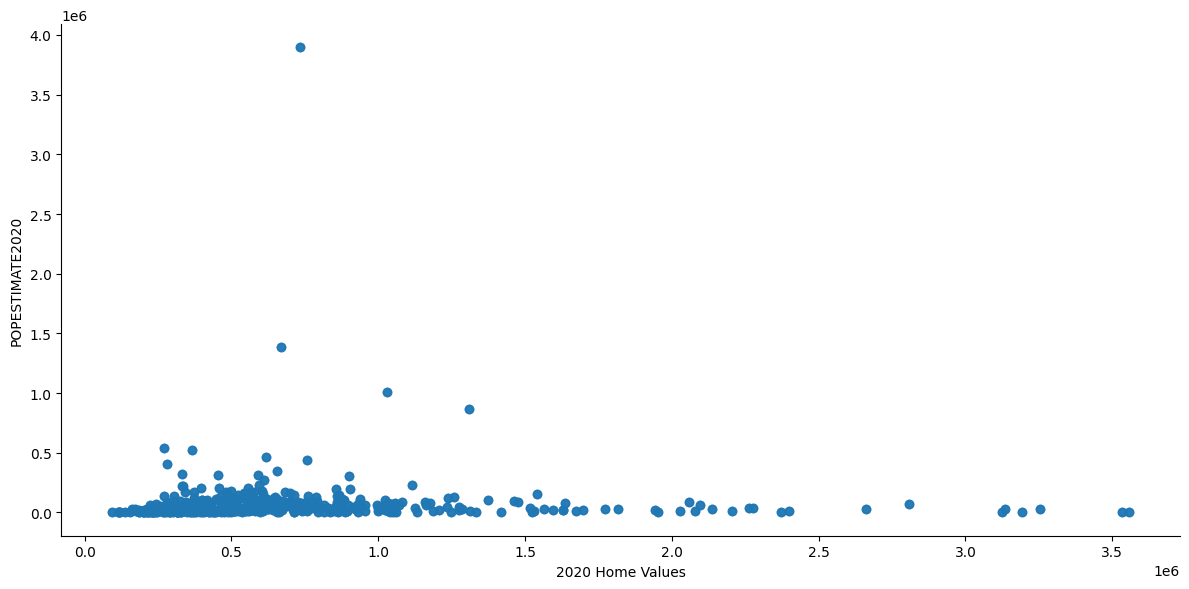

In [50]:
# plot relationship between home values and population in 2020
sns.lmplot(x = '2020 Home Values', y = 'POPESTIMATE2020', data = CA_homevalues_population, height = 6, aspect = 2, fit_reg = False)

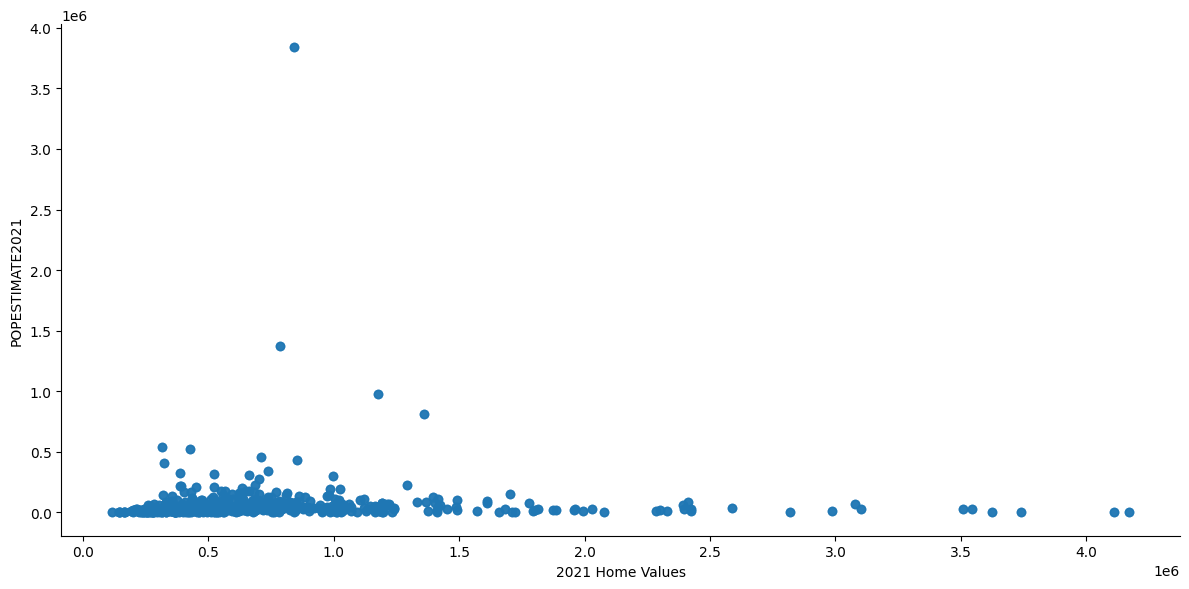

In [51]:
# plot relationship between home values and population in 2021
sns.lmplot(x = '2021 Home Values', y = 'POPESTIMATE2021', data = CA_homevalues_population, height = 6, aspect = 2, fit_reg = False)

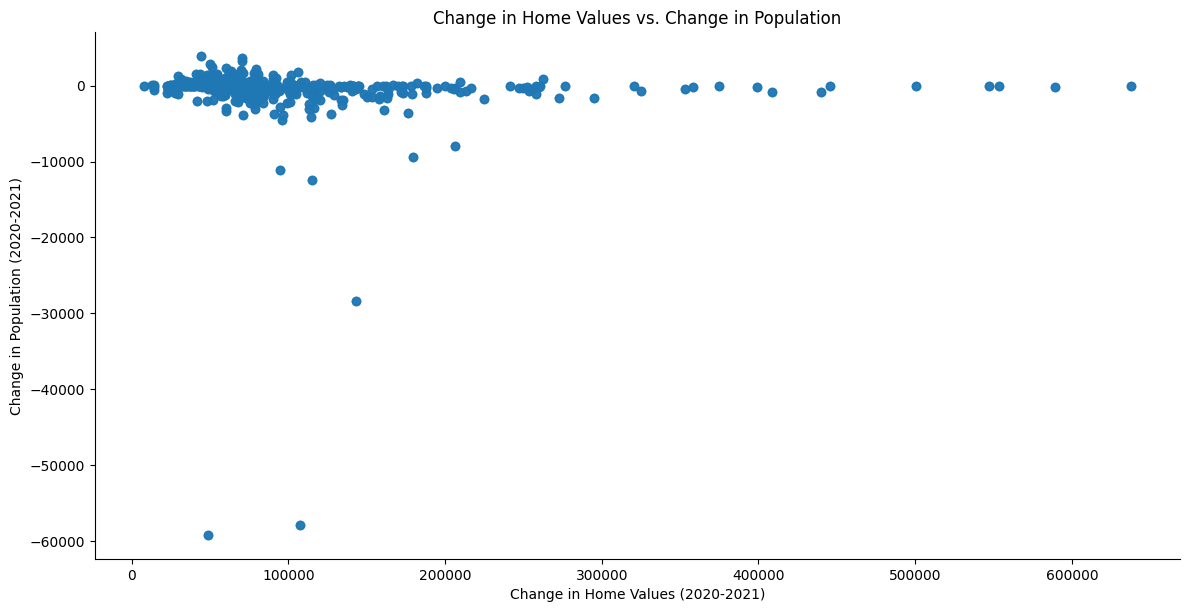

In [52]:
# plot relationship between the change in home values and change in population from 2020 to 2021
df_home_values_change = CA_homevalues_population
df_home_values_change['Home Values Change'] = df_home_values_change['2021 Home Values'] - df_home_values_change['2020 Home Values']
df_home_values_change['Population Change'] = df_home_values_change['POPESTIMATE2021'] - df_home_values_change['POPESTIMATE2020']
sns.lmplot(x='Home Values Change', y='Population Change', data=df_home_values_change, height = 6, aspect = 2, fit_reg = False)
plt.xlabel('Change in Home Values (2020-2021)')
plt.ylabel('Change in Population (2020-2021)')
plt.title('Change in Home Values vs. Change in Population')
plt.show()

In [53]:
x = CA_homevalues_population['2021 Home Values'] - CA_homevalues_population['2020 Home Values']
y = CA_homevalues_population['POPESTIMATE2021'] - CA_homevalues_population['POPESTIMATE2020']
alpha = 0.01
t_stat, p_value = stats.ttest_ind(y, x)
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a relationship between the decrease in California's population and the increase in housing prices for home values.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a significant relationship.")

Reject the null hypothesis.
There is a relationship between the decrease in California's population and the increase in housing prices for home values.


#### Rentals

In [54]:
CA_rentals_population.head()

,RegionName,State,CountyName,2020 Rentals,2021 Rentals,POPESTIMATE2020,POPESTIMATE2021
0,Malibu,CA,Los Angeles County,10146.77,12119.09,10617,10416
1,Malibu,CA,Los Angeles County,10146.77,12119.09,10617,10416
2,Coronado,CA,San Diego County,4515.23,5062.86,18136,19040
3,Coronado,CA,San Diego County,4515.23,5062.86,18136,19040
4,Manhattan Beach,CA,Los Angeles County,4500.53,4735.68,35377,34601


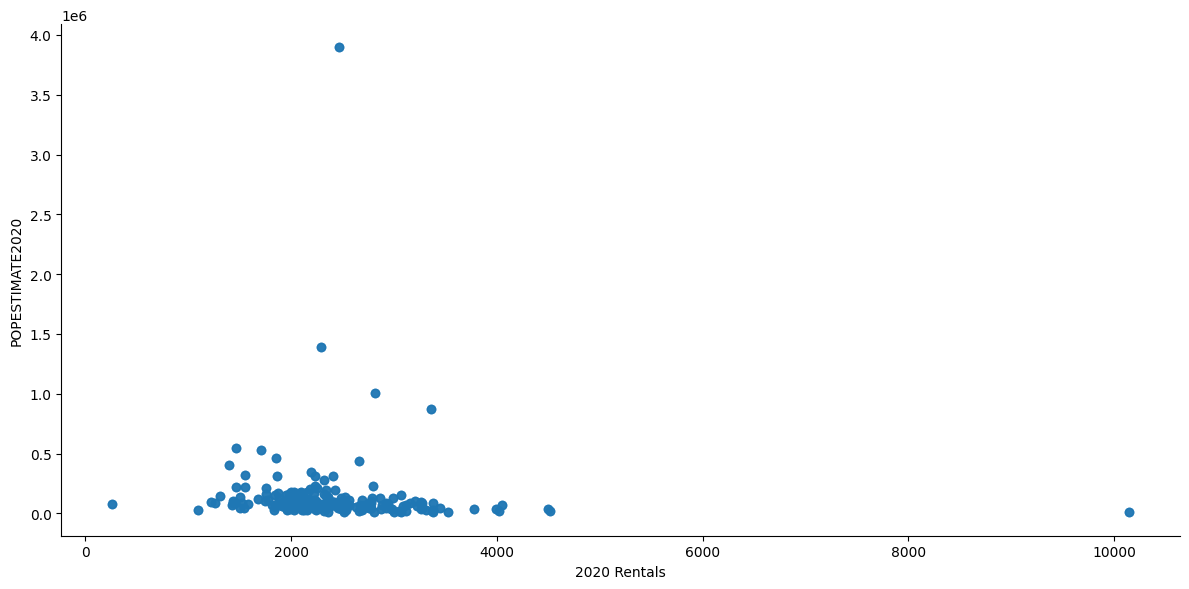

In [55]:
# plot relationship between rentals and population in 2020 
sns.lmplot(x = '2020 Rentals', y = 'POPESTIMATE2020', data = CA_rentals_population, height = 6, aspect = 2, fit_reg = False)

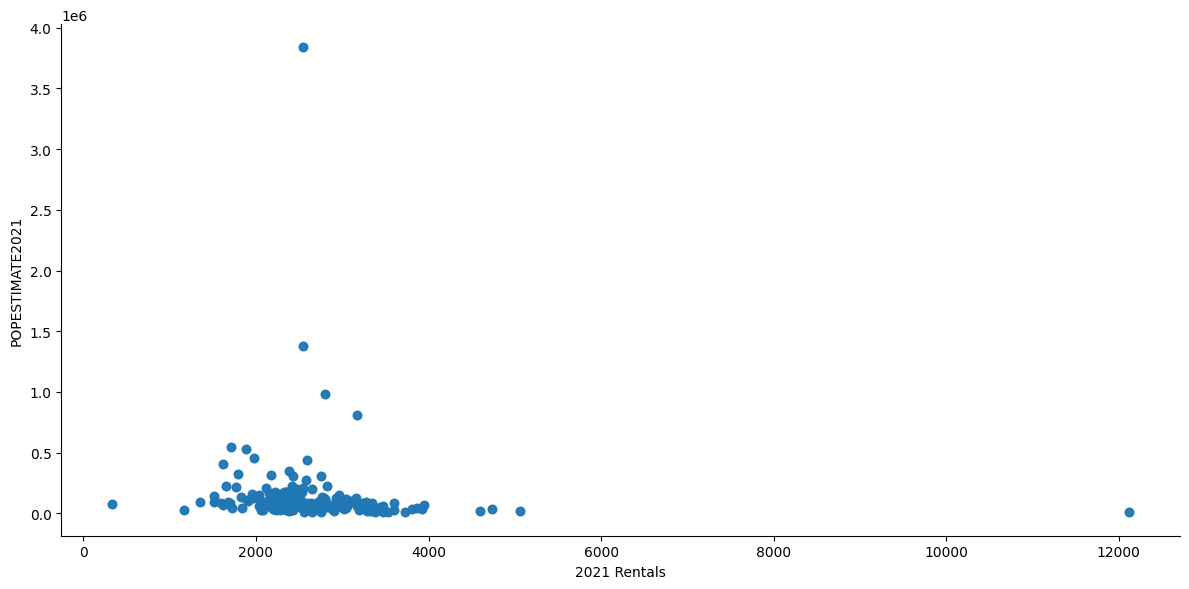

In [56]:
# plot relationship between rentals and population in 2021 
sns.lmplot(x = '2021 Rentals', y = 'POPESTIMATE2021', data = CA_rentals_population, height = 6, aspect = 2, fit_reg = False)

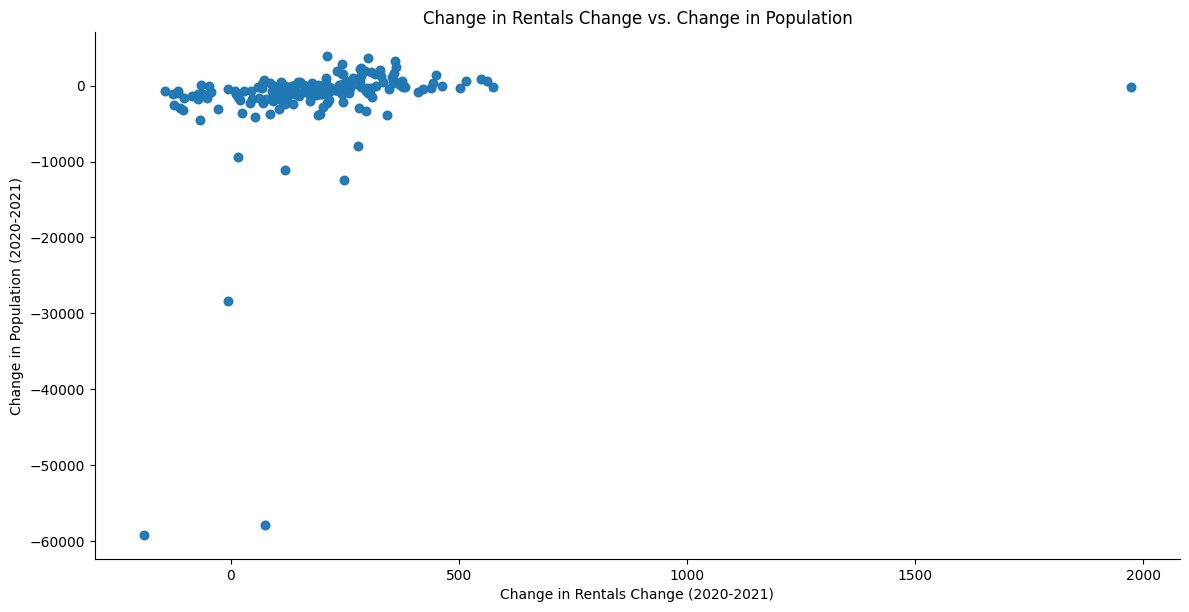

In [57]:
# plot relationship between the change in rentals and change in population from 2020 to 2021
df_rentals_change = CA_rentals_population
df_rentals_change['Rentals Change'] = df_rentals_change['2021 Rentals'] - df_rentals_change['2020 Rentals']
df_rentals_change['Population Change'] = df_rentals_change['POPESTIMATE2021'] - df_rentals_change['POPESTIMATE2020']
sns.lmplot(x='Rentals Change', y='Population Change', data=df_rentals_change, height = 6, aspect = 2, fit_reg = False)
plt.xlabel('Change in Rentals Change (2020-2021)')
plt.ylabel('Change in Population (2020-2021)')
plt.title('Change in Rentals Change vs. Change in Population')
plt.show()

In [58]:
x = CA_rentals_population['2021 Rentals'] - CA_rentals_population['2020 Rentals']
y = CA_rentals_population['POPESTIMATE2021'] - CA_rentals_population['POPESTIMATE2020']
alpha = 0.01
t_stat, p_value = stats.ttest_ind(y, x)
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a relationship between the decrease in California's population and the increase in housing prices for rentals.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a significant relationship.")

Reject the null hypothesis.
There is a relationship between the decrease in California's population and the increase in housing prices for rentals.


Thus, we support our hypothesis that there is a relationship between the decrease in California's populations and the increase in cost of spending on housing (rent and owner-occupied) from 2020 to 2021. To determine if California residents are likely to move out of state because they are not able to afford housing, we will conduct futher analysis on housing prices and California residents household incomes.

Next, we will explore the cost of spending on housing (rent and owner-occupied) and household icomes from 2020 to 2021 to see if California residents are able to afford housing.

### Support the research questions:


1. **How have housing costs (rent and owner-occupied) in California changed over time from 2020 to 2021, and how does this compare to Texas?**

Since the housing costs are categorized, we can observe the percentage of occupied housing units that fall within each category and see how that distribution changes from 2020 to 2021.


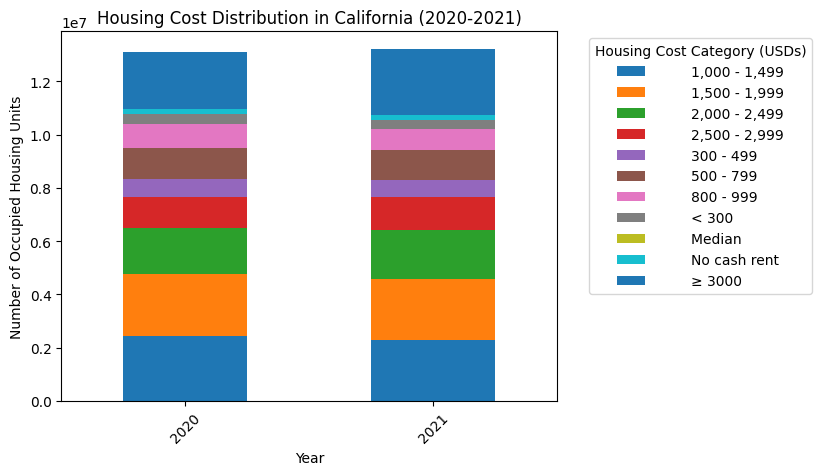

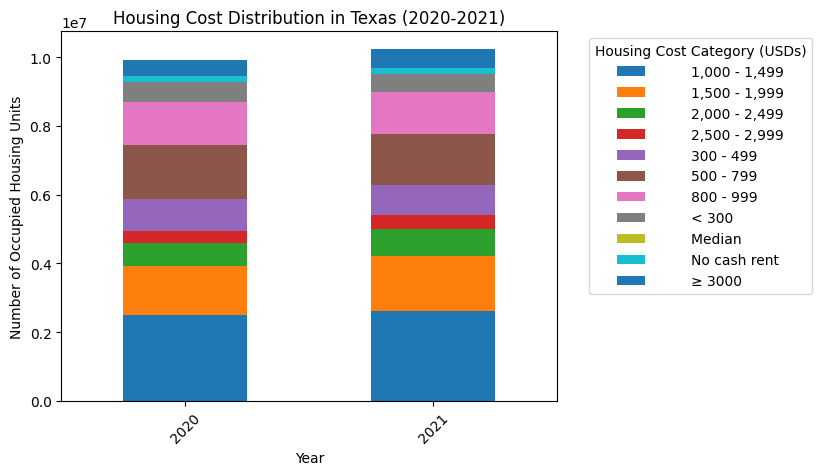

In [59]:
# Housing Occupied housing units	Housing Percent occupied housing units	Housing Owner-occupied housing units	Housing Percent owner-occupied housing units	Housing Renter-occupied housing units	Housing Percent renter-occupied housing units	Year	State	Income Occupied housing units	Income Percent occupied housing units	Income Owner-occupied housing units	Income Percent owner-occupied housing units	Income Renter-occupied housing units	Income Percent renter-occupied housing units	Population	Income Category	Housing Cost Category
# 0	390873.00	0.03	274063.00	0.04	116810.00	0.02	2020	California	365131.00	0.03	123955.00	0.02	241176.00	0.04	39501653	Less than $5,000	Less than $300
# 1	682136.00	0.05	535640.00	0.07	146496.00	0.03	2020	California	249756.00	0.02	77011.00	0.01	172745.00	0.03	39501653	$5,000 to $9,999	$300 to $499

states = ['California', 'Texas']
df_states = df_clean[df_clean['State'].isin(states)]

for state in states:
    df_state = df_states[df_states['State'] == state]
    df_state.groupby(['Year', 'Housing Cost Category'])['Housing Occupied housing units'].sum().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Housing Cost Distribution in {state} (2020-2021)')
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Number of Occupied Housing Units')
    plt.legend(title='Housing Cost Category (USDs)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

2. **What percentage of a household income is typically spent on housing in California from 2020 to 2021, and how does this compare to Texas?**

Given the categorization, it would be difficult to determine an exact percentage of income spent on housing. We could compare the distribution of housing costs and income categories, but this won't give us a precise percentage of income spent on housing.

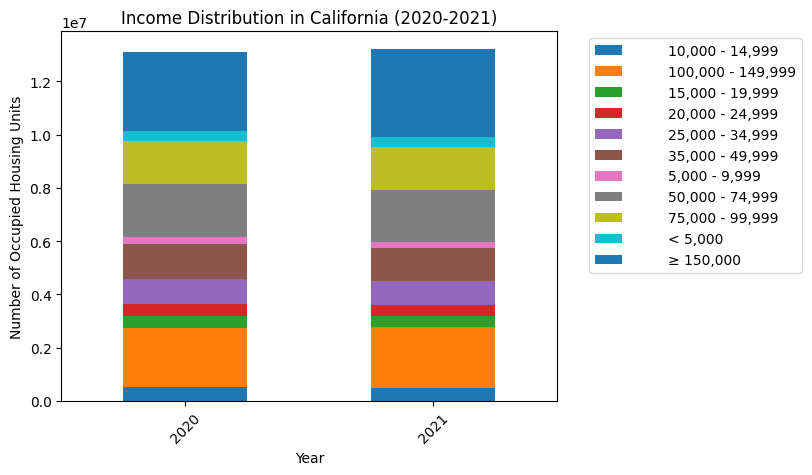

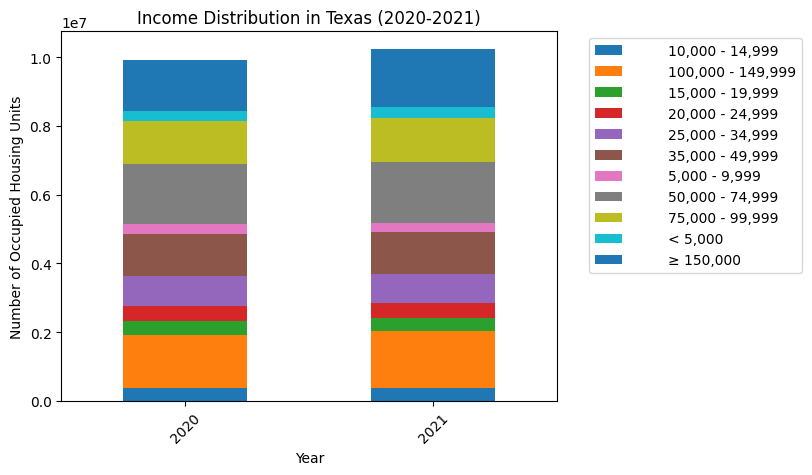

In [60]:
for state in states:
    df_state = df_states[df_states['State'] == state]
    df_state.groupby(['Year', 'Income Category'])['Income Occupied housing units'].sum().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Income Distribution in {state} (2020-2021)')
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Number of Occupied Housing Units')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

3. **What has been the population rate of California over time, and how has it changed from 2020 to 2021?**

We can plot the population over time for each state:

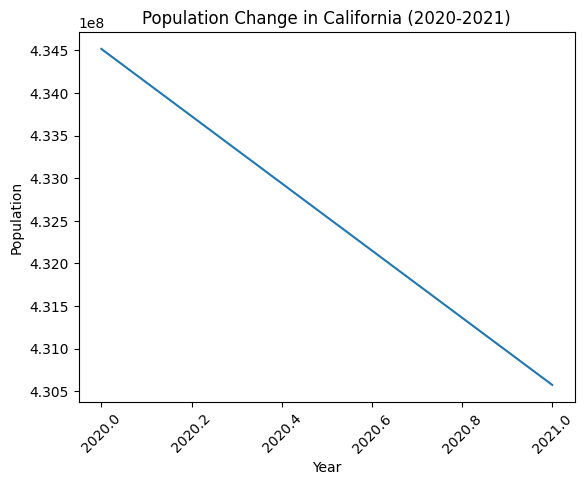

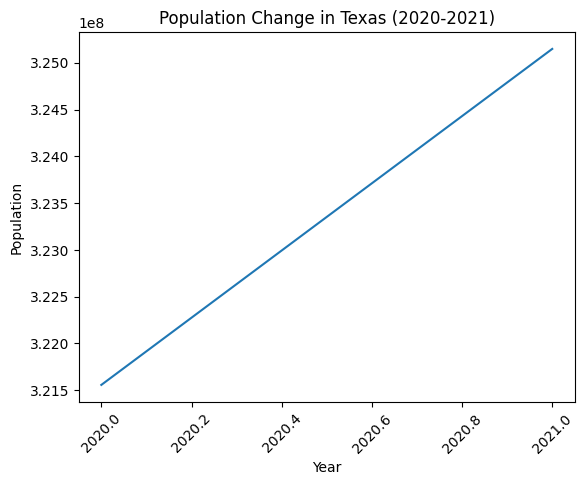

In [61]:
for state in states:
    df_state = df_states[df_states['State'] == state]
    df_state.groupby('Year')['Population'].sum().plot()
    plt.title(f'Population Change in {state} (2020-2021)')
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.show()

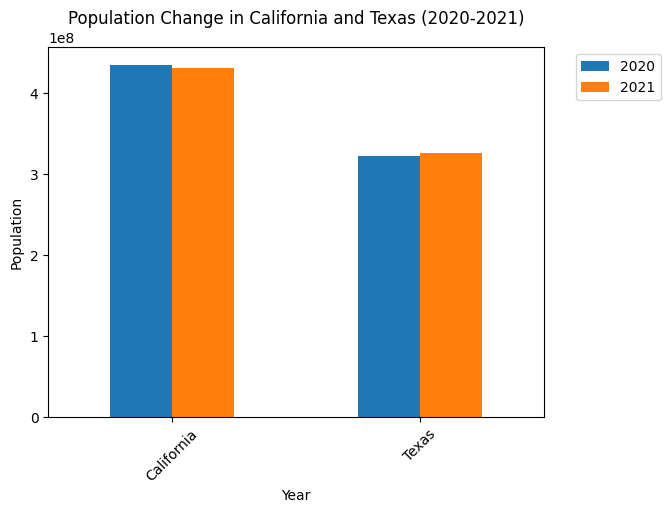

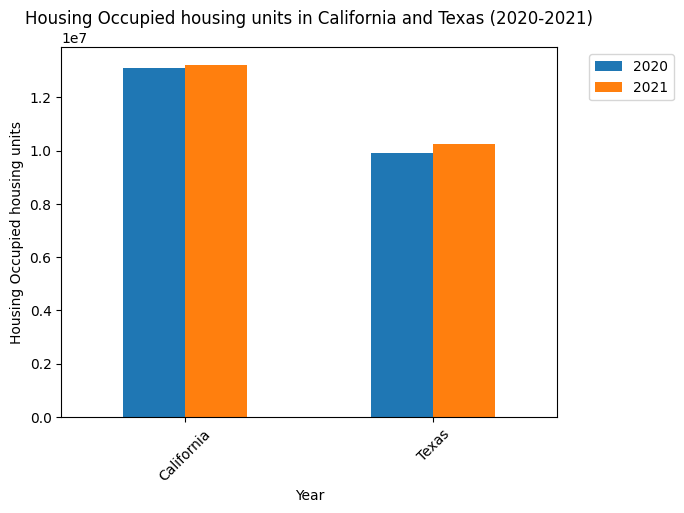

In [62]:
# Compare texas and california
df_states.groupby(['State', 'Year'])['Population'].sum().unstack().plot(kind='bar')
plt.title('Population Change in California and Texas (2020-2021)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df_states.groupby(['State', 'Year'])['Housing Occupied housing units'].sum().unstack().plot(kind='bar')
plt.title('Housing Occupied housing units in California and Texas (2020-2021)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Housing Occupied housing units')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

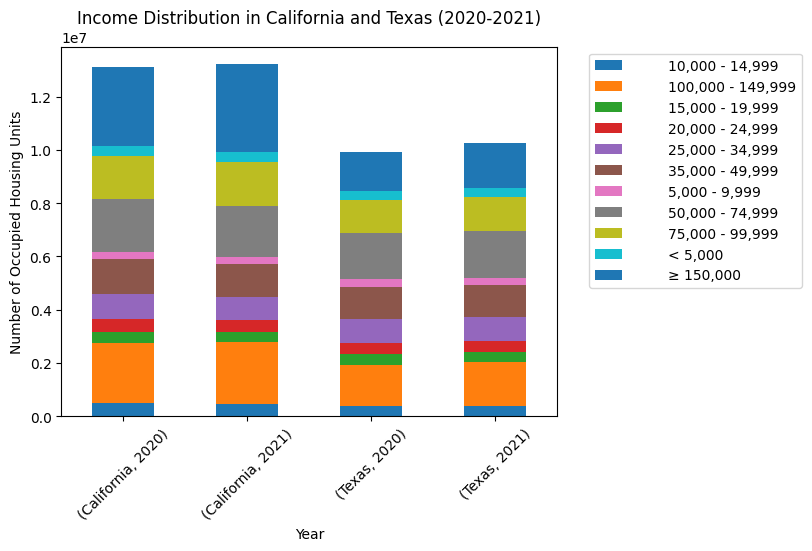

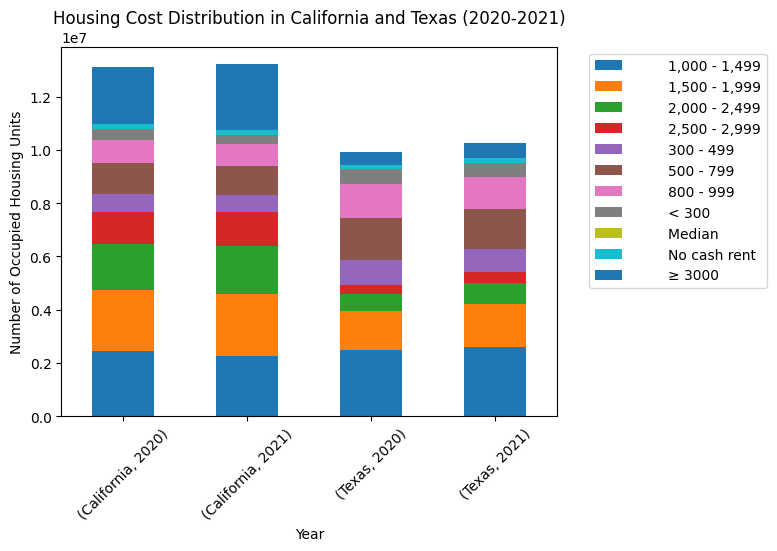

In [63]:
# Compare the income distribution in California and Texas
df_states.groupby(['State', 'Year', 'Income Category'])['Income Occupied housing units'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Income Distribution in California and Texas (2020-2021)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Occupied Housing Units')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Compare the housing cost distribution in California and Texas
df_states.groupby(['State', 'Year', 'Housing Cost Category'])['Housing Occupied housing units'].sum().unstack().plot(kind='bar', stacked=True)
plt.title('Housing Cost Distribution in California and Texas (2020-2021)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Occupied Housing Units')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [64]:
new_df_states= df_states[['Housing Cost Category','Housing Occupied housing units','Income Category','Income Occupied housing units','Year','State']]
new_df_states

,Housing Cost Category,Housing Occupied housing units,Income Category,Income Occupied housing units,Year,State
0,< 300,390873.00,"< 5,000",365131.00,2020,California
1,300 - 499,682136.00,"5,000 - 9,999",249756.00,2020,California
2,500 - 799,1164232.00,"10,000 - 14,999",507398.00,2020,California
3,800 - 999,879823.00,"15,000 - 19,999",435382.00,2020,California
4,"1,000 - 1,499",2431992.00,"20,000 - 24,999",474093.00,2020,California
5,"1,500 - 1,999",2320070.00,"25,000 - 34,999",929716.00,2020,California
6,"2,000 - 2,499",1732363.00,"35,000 - 49,999",1316064.00,2020,California
7,"2,500 - 2,999",1175576.00,"50,000 - 74,999",2007523.00,2020,California
8,≥ 3000,2142269.00,"75,000 - 99,999",1616338.00,2020,California
9,No cash rent,183780.00,"100,000 - 149,999",2235114.00,2020,California


By looking at the table above, we learn that it's difficult to determine an exact percentage of income spent on housing between California and Texas in 2020 and 2021 since there are many different categories and they are not aligned with each other, plus the financial characteristics tables do not show the exact income nor monthly housing cost for each individual. Hence, we will migrate this difficulty by using the median annual income and median annual housing costs in California and Texas within these two years. The median values provide a measure that represents the middle point in the income and housing cost distributions, making them suitable for analyzing the average income and housing costs so that we can see the relationship between household income and housing prices in California and Texas.

In [65]:
# Extract the median California household income in 2020 and 2021
median_california_household_income_2020 = int(california_household_income_2020.at[11,'Occupied housing units'].replace(',',""))
median_california_household_income_2021 = int(california_household_income_2021.at[11,'Occupied housing units'].replace(',',""))
# Extract the median Texas household income in 2020 and 2021
median_texas_household_income_2020 = int(texas_household_income_2020.at[11,'Occupied housing units'].replace(',',""))
median_texas_household_income_2021 = int(texas_household_income_2021.at[11,'Occupied housing units'].replace(',',""))

# Calculate percentage between household income and housing cost
median_california_housing_cost_2020 = new_df_states.loc[(new_df_states['State'] == 'California') & (new_df_states['Year'] == 2020) & (new_df_states['Housing Cost Category'] == '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Median '), 'Housing Occupied housing units'].values[0]*12
percentage_california_2020 = median_california_housing_cost_2020 / median_california_household_income_2020 * 100
print("Median California annual housing cost in 2020 (dollars) is: ",median_california_housing_cost_2020)
print("Median California annual household income in 2020 (dollars) is: ", median_california_household_income_2020)
print("Percentage between household income and housing prices California in 2020:  {:.3f}".format(percentage_california_2020))

median_texas_housing_cost_2020 = new_df_states.loc[(new_df_states['State'] == 'Texas') & (new_df_states['Year'] == 2020) & (new_df_states['Housing Cost Category'] == '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Median '), 'Housing Occupied housing units'].values[0]*12
percentage_texas_2020 = median_texas_housing_cost_2020 / median_texas_household_income_2020 * 100
print("Median Texas annual housing cost in 2020 (dollars) is: ",median_texas_housing_cost_2020)
print("Median Texas annual household income in 2020 (dollars) is: ", median_texas_household_income_2020)
print("Percentage between household income and housing prices Texas in 2020:  {:.3f}".format(percentage_texas_2020))

median_california_housing_cost_2021 = new_df_states.loc[(new_df_states['State'] == 'California') & (new_df_states['Year'] == 2021) & (new_df_states['Housing Cost Category'] == '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Median '), 'Housing Occupied housing units'].values[0]*12
percentage_california_2021 = median_california_housing_cost_2021 / median_california_household_income_2021 * 100
print("Median California annual housing cost in 2021 (dollars) is: ",median_california_housing_cost_2021)
print("Median California annual household income in 2021 (dollars) is: ", median_california_household_income_2021)
print("Percentage between household income and housing prices California in 2021:  {:.3f}".format(percentage_california_2021))

median_texas_housing_cost_2021 = new_df_states.loc[(new_df_states['State'] == 'Texas') & (new_df_states['Year'] == 2021) & (new_df_states['Housing Cost Category'] == '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Median '), 'Housing Occupied housing units'].values[0]*12
percentage_texas_2021 = median_texas_housing_cost_2021 / median_texas_household_income_2021 * 100
print("Median Texas annual housing cost in 2020 (dollars) is: ",median_texas_housing_cost_2021)
print("Median Texas annual household income in 2021 (dollars) is: ", median_texas_household_income_2021)
print("Percentage between household income and housing prices Texas in 2021:  {:.3f}".format(percentage_texas_2021))


Median California annual housing cost in 2020 (dollars) is:  20256.0
Median California annual household income in 2020 (dollars) is:  78672
Percentage between household income and housing prices California in 2020:  25.747
Median Texas annual housing cost in 2020 (dollars) is:  13140.0
Median Texas annual household income in 2020 (dollars) is:  63826
Percentage between household income and housing prices Texas in 2020:  20.587
Median California annual housing cost in 2021 (dollars) is:  21492.0
Median California annual household income in 2021 (dollars) is:  84097
Percentage between household income and housing prices California in 2021:  25.556
Median Texas annual housing cost in 2020 (dollars) is:  13932.0
Median Texas annual household income in 2021 (dollars) is:  67321
Percentage between household income and housing prices Texas in 2021:  20.695


4. **Does increase in housing costs affect the decreasing in California's populations from 2020 to 2021?**

Based on the p-value from hypothesis tests in `Relationship Between California's Housing Costs and Population` for both rentals and home values we can see that both p-values are smaller than alpha (1%), therefore, we are able to reject the null hypothesis that "there is no relationship between increasing in cost of housing in California and the decreasing in California's populations from 2020 to 2021." Therefore, the increase in housing costs affect the decreasing in California's populations because there is a relationship between increasing in cost of housing in California and the decreasing in California's populations from 2020 to 2021.

Based on the data on `new_df_states`:
- In **California**:
    - **In 2020**, California residents spent approximately 25.747% of their income on housing.
    - **In 2021**, this percentage slightly decreased to 25.556%.
- In **Texas**:
    - **In 2020**, Texas residents spent approximately 20.587% of their income on housing.
    - **In 2021**, this percentage slightly increased to 20.695%.

That means, on average, residents in California are spending a higher percentage of their income on housing compared to Texas. Furthermore, on the table `TODO: NAME of the TABLE`, we can see the economic conditions in California and Texas from 2020 to 2021:

- **Median Household Income:** In both states, the median household income increased from 2020 to 2021. In California, it increased from $78,672 to $84,097, and in Texas, it increased from $63,826 to $67,321.
- **Median Housing Costs:** Housing costs also increased in both states during this period. In California, the median monthly housing cost increased from $1,688 in 2020 to $1,791 in 2021. In Texas, the median monthly housing cost increased from $1,095 in 2020 to $1,161 in 2021.
- **Distribution of Income and Housing Costs:** The data provided also gives us the distribution of income and housing costs of each state. In both states, there are households spanning a wide range of income and housing cost brackets.
    - More households in the highest income category (≥ $150,000) in California than in Texas in both years.
    - More households with the highest housing costs (≥ $3,000) in California than in Texas in both years.
While income and housing costs increased in both states from 2020 to 2021, California had higher median values for both metrics. Furthermore, the distribution of income and housing costs in California tended to always higher than in Texas. 

Then we could conduct a correlation analysis between the changes in housing prices and changes in population for both states in `part 3` and find a negative correlation in California as housing prices go up and population goes down; and a positive correlation in Texas. These evidence suggesting that people are moving there despite the increase in housing costs.

With that said increasing housing costs in California are causing residents to move out of state

